<h3>Toy example experiment 6.18</h3>

Use the magenpy GWASimulator based on RA's genotypes data (d1CM22_sorted.bed) to simulate phenotypes.  
the heritibility = 0.5, (Gaussian Mixture Proportion)pi = [.85, .15]

In [5]:
import numpy as np
import pandas as pd
import magenpy as mgp
import viprs as vp
import subprocess
import io
from viprs.eval.metrics import r2 
from data.utils.Simulate_training import *
from sklearn.preprocessing import scale
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import pearsonr

In [2]:
#simulate 
g_sim = mgp.GWASimulator("CMdream1/chr22/d1CM22_sorted",
                         pi = [.99, .01],
                         h2=0.5)
g_sim.simulate()
g_sim.to_phenotype_table()

> Reading BED file...


> Generating polygenic scores...


,FID,IID,phenotype
0,0,1721000,-0.127795
1,0,1722000,1.439406
2,0,1723000,-0.863768
3,0,1725000,0.981617
4,0,1726000,0.291712
...,...,...,...
172,0,1921000,0.305912
173,0,1922000,0.446580
174,0,1923000,0.300280
175,0,1924000,0.851494


In [47]:
import pandas as pd
pd.read_csv("CMAll_qced/chr22/ALL_CM_chr22.bim", sep="\t", header=None)


,0,1,2,3,4,5
0,22,rs4911642,-11.277499,14884399,G,A
1,22,rs2027653,-7.277181,15298335,G,A
2,22,rs9605903,-5.959143,15434720,G,A
3,22,rs4819849,-5.013115,15532611,G,A
4,22,rs2845380,-4.525156,15583103,A,G
...,...,...,...,...,...,...
18287,22,rs3810648,75.083207,51175626,G,A
18288,22,rs2285395,75.085202,51178090,A,G
18289,22,rs2238837,75.111632,51212875,C,A
18290,22,rs34726907,75.112193,51213613,T,C


In [48]:
g_sim.perform_gwas()
g_sim.to_summary_statistics_table().to_csv(
    "Toy_example_expr/d1CM22_sorted.sumstats", sep="\t", index=False
)

> Performing GWAS...


In [49]:
# Load summary statistics（simulate phenotype from above) and match them with perviously
gdl_sim = mgp.GWADataLoader(bed_files="CMdream1/chr22/d1CM22_sorted",
                            sumstats_files="Toy_example_expr/d1CM22_sorted.sumstats",
                            sumstats_format="magenpy")

> Reading BED file...
> Reading summary statistics file...
> Harmonizing data...


In [50]:
pd.read_csv("Toy_example_expr/d1CM22_sorted.sumstats", sep="\t", header=None)

,0,1,2,3,4,5,6,7,8,9,10
0,CHR,SNP,POS,A1,A2,MAF,N,BETA,Z,SE,PVAL
1,22,rs4911642,14884399,G,A,0.12721893491124261,169,-0.10066811602744873,-1.3086855083568336,0.07692307692307691,0.19064090255884392
2,22,rs2027653,15298335,G,A,0.3742690058479532,171,0.06575746971452175,0.8598904958056102,0.07647191129018724,0.38984940805409973
3,22,rs5747620,15412698,G,A,0.3953488372093023,172,-0.06470192859415928,-0.8485578383199547,0.07624928516630232,0.3961273759060673
4,22,rs5747968,15447504,C,A,0.3700564971751412,177,0.144060947338801,1.9166062477783603,0.07516460280028288,0.055287973686047466
...,...,...,...,...,...,...,...,...,...,...,...
7916,22,rs715586,49510004,A,G,0.14204545454545456,176,0.03129676816135106,0.4151985485677701,0.0753778361444409,0.67799656125441
7917,22,rs8137951,49512530,A,G,0.2768361581920904,177,0.053257697016744224,0.7085475746908861,0.07516460280028288,0.47860527923270757
7918,22,rs756638,49518559,A,G,0.2471590909090909,176,0.02591073316897566,0.3437447198580345,0.0753778361444409,0.731038276628504
7919,22,rs3810648,49522492,G,A,0.048295454545454544,176,0.06135576764892377,0.8139762400628258,0.0753778361444409,0.4156585625484429


In [51]:
gdl_sim.compute_ld(estimator='sample',
                   output_dir='Toy_example_expr/out/ld/')
# gdl_sim.compute_ld(estimator='windowed',
#                    output_dir='Toy_example_expr/out/ld/',
#                    window_size=100)

> Computing LD matrix...


In [52]:
# attempt to read the computed LD
gdl_sim.load_ld()
gdl_sim.ld

{22: <magenpy.LDMatrix.LDMatrix at 0x7f3f2848b770>}

In [53]:
i =  10
d1_LD = mgp.LDMatrix.from_path("Toy_example_expr/out/ld/ld/chr_22")
# for i in range(0,7920):
#     print(d1_LD[i].shape)

print(d1_LD.shape)
print(pd.DataFrame(d1_LD))
print("the first snp")
d1_LD[0]

(7920, 7920)
                                                      0
0     [0.9548013806343079, -0.06386563181877136, -0....
1     [-0.06386563181877136, 0.9661023020744324, 0.3...
2     [-0.052265480160713196, 0.3649350702762604, 0....
3     [0.11299331486225128, -0.08305802941322327, -0...
4     [-0.03351875767111778, -0.10596761107444763, -...
...                                                 ...
7915  [-0.012802516110241413, 0.1283041536808014, 0....
7916  [0.04243805631995201, 0.046246979385614395, -0...
7917  [-0.015206963755190372, -0.09169330447912216, ...
7918  [-0.015370112843811512, -0.10893985629081726, ...
7919  [0.021045226603746414, -0.144325390458107, 0.0...

[7920 rows x 1 columns]
the first snp


array([ 0.95480138, -0.06386563, -0.05226548, ..., -0.01520696,
       -0.01537011,  0.02104523])

Use Viprs, initialize the viprs model based on the <code> gdl_sim model</code> containing the GWAS data and the LD matrix (using xarray method) for the chr22.

In [54]:
v = vp.VIPRS(gdl_sim)

In [55]:
v.fit()

> Initializing model parameters
> Loading LD matrices into memory...
> Performing model fit...
> Using up to 1 threads.


  0%|          | 0/1000 [00:00<?, ?it/s]

 18%|█▊        | 176/1000 [00:23<01:49,  7.55it/s]

Converged at iteration 177 || ELBO: -251.237770
> Final ELBO: -251.237770
> Estimated heritability: 0.071972
> Estimated proportion of causal variants: 0.058617


For CMdream1/chr22/d1CM22_sorted, with <code> 177 patients</code> as samples.  
Draw the ELBO as a function of iterations. 

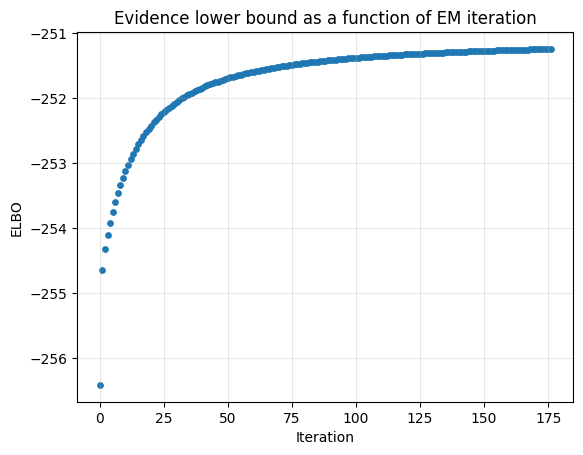

In [56]:
ELBO_list = v.history['ELBO']
num = len(ELBO_list)

#draw a plot Evidence lower bound as a function of EM iteration.
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(range(num), np.array(ELBO_list),s=15)
plt.grid(which="major",alpha=0.3)
plt.xlabel("Iteration")
plt.ylabel("ELBO")
plt.title("Evidence lower bound as a function of EM iteration")
plt.show()

In [52]:
# Once the model converges, we can generate PRS estimates 
prs_chr22 = v.predict()
print(len(prs_chr22))
prs_chr22

> Generating polygenic scores...
177


array([ 0.02213294,  0.01030989, -0.04751134, -0.02520596, -0.06379665,
       -0.01775891, -0.02176398,  0.00256278, -0.10202483, -0.00537966,
       -0.00684736,  0.00431946, -0.03045196, -0.04494704,  0.06418788,
        0.00809557, -0.11633428, -0.01611182,  0.03895207, -0.00493955,
        0.05093899,  0.05104608,  0.0668653 , -0.04841749, -0.01554006,
       -0.05011316,  0.07380084,  0.01592508, -0.06715295, -0.02340198,
        0.02807839, -0.0182668 , -0.03962565,  0.07902709, -0.01807636,
       -0.04922694, -0.02816407, -0.03047674, -0.00563501,  0.03402863,
        0.03379095, -0.02213383,  0.01395097,  0.00212914, -0.01996996,
        0.02835084,  0.03349162,  0.04290841,  0.06799205,  0.01611444,
       -0.06164484, -0.00410113,  0.0529813 ,  0.05605356, -0.02774756,
       -0.06209518, -0.06550636,  0.03983694, -0.037691  ,  0.10106089,
        0.01048883, -0.06935535, -0.01111233,  0.03445681,  0.00406039,
       -0.0373099 ,  0.07458643, -0.03387453,  0.05089663, -0.00

In [53]:
# To examine posterior estimates for the model parameters, you can simply invoke the .to_table() method:
v.to_table()

,CHR,SNP,A1,A2,BETA,PIP,VAR_BETA
0,22,rs4911642,G,A,0.000154,0.028844,0.000010
1,22,rs2027653,G,A,0.000106,0.028192,0.000009
2,22,rs5747620,G,A,-0.000139,0.028604,0.000010
3,22,rs5747968,C,A,0.000036,0.027630,0.000009
4,22,rs2236639,A,G,-0.000152,0.028781,0.000010
...,...,...,...,...,...,...,...
7915,22,rs715586,A,G,0.000088,0.027993,0.000009
7916,22,rs8137951,A,G,-0.000093,0.028034,0.000009
7917,22,rs756638,A,G,-0.000034,0.027630,0.000009
7918,22,rs3810648,G,A,-0.000248,0.030528,0.000011


<code>Validation</code> use another the simulate phenotype still on the d1chr22_sorted.bed as the validation part. 

In [54]:
#simulate 
g2_sim = mgp.GWASimulator("CMdream1/chr22/d1CM22_sorted",
                         pi = [.99, .01],
                         h2=0.5)
g2_sim.simulate()
a = g2_sim.to_phenotype_table()
a.to_csv("Toy_example_expr/phenotype/g2_sim_pheno.txt",sep='\t', index=False, header=False)
g2_sim.perform_gwas()
g2_sim.to_summary_statistics_table().to_csv(
    "Toy_example_expr/d1CM22_sorted_valid.sumstats", sep="\t", index=False
)

# Load summary statistics（simulate phenotype from above) and match them with perviously
gdl2_sim = mgp.GWADataLoader(bed_files="CMdream1/chr22/d1CM22_sorted",
                            phenotype_file="Toy_example_expr/phenotype/g2_sim_pheno.txt",
                            sumstats_files="Toy_example_expr/d1CM22_sorted_valid.sumstats",
                            sumstats_format="magenpy")
gdl2_sim.compute_ld(estimator='sample',
                   output_dir='Toy_example_expr/out/ld_val/')


> Reading BED file...
> Generating polygenic scores...


> Performing GWAS...
> Reading BED file...
> Reading phenotype file...
> Reading summary statistics file...
> Harmonizing data...
> Computing LD matrix...


In [55]:
val_prs = v.predict(gdl2_sim)

> Generating polygenic scores...


In [56]:
from viprs.eval.metrics import r2 
r2(val_prs, gdl2_sim.sample_table.phenotype)

0.0009120644422682458

Validation use the chr22 genotypes in <code> dream2 </code> file sets.  
Do the same steps as before to got <code>"CMdream2/chr22/d2CM22_sorted"</code> binary file sets (.bed + .fam + .bim).  
Sorted the SNPs from dream2 for chromosome 22 and add CM values to it. 

In [ ]:
d2_bim = pd.read_csv("data/RA_challenge_qced_genotypes/dream2.bim", sep="\t", header=None)
d2_filter_bim = d2_bim[d2_bim[0] ==22][1]
d2_sorted_chr22 = d2_filter_bim.sort_values()
d2_sorted_chr22.to_csv("CMdream2/d2_sorted_chr22_bim.txt", header=False,
                       index=False, sep="\t")

In [6]:
# Use simulate method to create phenotpyes 
#simulate 
# CMdream2/chr22/d2CM22_sorted
g3_sim = mgp.GWASimulator("CMdream2/chr22/d2CM22_sorted",
                         pi = [.85, .15],
                         h2=0.5)
g3_sim.simulate()
a = g3_sim.to_phenotype_table()
a.to_csv("Toy_example_expr/phenotype/val_d2chr22_pheno.txt",sep='\t', index=False, header=False)
g3_sim.perform_gwas()
g3_sim.to_summary_statistics_table().to_csv(
    "Toy_example_expr/val_d2chr22_valid.sumstats", sep="\t", index=False
)

# Load summary statistics（simulate phenotype from above) and match them with perviously
gdl3_sim = mgp.GWADataLoader(bed_files="CMdream2/chr22/d2CM22_sorted",
                            phenotype_file="Toy_example_expr/phenotype/val_d2chr22_pheno.txt",
                            sumstats_files="Toy_example_expr/val_d2chr22_valid.sumstats",
                            sumstats_format="magenpy",
                            backend="plink")
gdl3_sim.compute_ld(estimator='sample',
                   output_dir='Toy_example_expr/d2chr22_out/ld_val/')

> Reading BED file...
> Generating polygenic scores...
> Performing GWAS...
> Reading BED file...
> Reading phenotype file...
> Reading summary statistics file...
> Harmonizing data...
> Computing LD matrix...


Exception ignored in: <finalize object at 0x7fbdb8453070; dead>
Traceback (most recent call last):
  File "/usr/lib/python3.7/weakref.py", line 572, in __call__
    return info.func(*info.args, **(info.kwargs or {}))
  File "/usr/lib/python3.7/tempfile.py", line 934, in _cleanup
    _rmtree(name)
  File "/usr/lib/python3.7/shutil.py", line 485, in rmtree
    onerror(os.lstat, path, sys.exc_info())
  File "/usr/lib/python3.7/shutil.py", line 483, in rmtree
    orig_st = os.lstat(path)
FileNotFoundError: [Errno 2] No such file or directory: 'temp/ld_ca2vps9q'


7819 (2606, None)


/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/scipy/sparse/_index.py:125: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


ValueError: Invalid LD Matrix: Element 0 does not have matching LD boundaries!

In [ ]:
val2_prs = v.predict(gdl3_sim)

> Generating polygenic scores...


In [ ]:
#To evaluate the accuracy of the polygenic score, 
# you can use some of the provided metrics with the viprs package. 
# For quantitative traits, it is customary to report the prediction R^2, 
# or the proportion of variance explained by the PRS:
r2(val2_prs, gdl3_sim.sample_table.phenotype)

0.011801941348497371

In [ ]:
#simulate 
g2_sim = mgp.GWASimulator("data/RA_challenge_qced_genotypes/dream3",
                         pi = [.85, .15],
                         h2=0.5)
g2_sim.simulate()
a = g2_sim.to_phenotype_table()

> Reading BED file...


Generating polygenic scores: 100%|██████████| 27/27 [00:06<00:00,  4.33it/s]


In [ ]:
a

,FID,IID,phenotype
0,0,2280000,-1.159332
1,0,2282000,0.457723
2,0,2283000,0.709957
3,0,2284000,-0.482596
4,0,2285000,0.660879
...,...,...,...
412,0,2767000,-1.817492
413,0,2768000,-0.738611
414,0,2769000,-0.103463
415,0,2770000,-1.178744


<h3>June 24th repeat above experiment with the ALL_CM_chr22 data</h3>

*With changing fix-parameters in June 28th*

We checked dream1,2,3 binary files they contain <code>880</code> patients in total. To get the <code>2706 patients</code> we need to <code>merge all</code> RA_challenge_qced_genotypes data together. 

We used the command below to created merge files:  
<code>cd data/RA_challenge_qced_genotypes && bash ../utils/mergeSNPS.sh</code>  
The last file <code> merge10 </code> is the complete file that contains all 11 experiments data, which sums up to 2706 patients.  

Therefore, we can use the <code> merge10.bed + .bim + .fam </code> files to repeat our experiments with magenpy and viprs use the simulator. 

For below, we selected the <code>ALL_CM_chr22 binary files </code>, which is the information about chr22 based on 2706 patients.


In [2]:
import numpy as np
import pandas as pd
import magenpy as mgp
import viprs as vp

In [63]:
#simulate 
g_sim = mgp.GWASimulator("CMAll_qced/chr22/ALL_CM_chr22",
                         pi = [.99, .01],
                         h2=0.5)
g_sim.simulate()
g_sim.to_phenotype_table()

> Reading BED file...
> Generating polygenic scores...


,FID,IID,phenotype
0,0,1000,0.274872
1,0,2000,1.196193
2,0,3000,-0.594963
3,0,4000,0.394835
4,0,5000,-0.769861
...,...,...,...
2701,0,3061000,-1.152691
2702,0,3062000,-0.402827
2703,0,3064000,-0.070375
2704,0,3065000,0.837928


In [64]:
g_sim.perform_gwas()
g_sim.to_summary_statistics_table().to_csv(
    "Toy_example_expr/ALL_CM22.sumstats", sep="\t", index=False
)

> Performing GWAS...


/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


In [65]:
# Load summary statistics（simulate phenotype from above) and match them with perviously
gdl_sim = mgp.GWADataLoader(bed_files="CMAll_qced/chr22/ALL_CM_chr22",
                            sumstats_files="Toy_example_expr/ALL_CM22.sumstats",
                            sumstats_format="magenpy")

> Reading BED file...
> Reading summary statistics file...
> Harmonizing data...


In [66]:
gdl_sim.compute_ld(estimator='sample',
                   output_dir='Toy_example_expr/ALLchr22_out/')

# gdl_sim.compute_ld(estimator='windowed',
#                    output_dir='Toy_example_expr/ALLchr22_out/windowed/',
#                    window_size=100)

> Computing LD matrix...


/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/dask/array/routines.py:318: PerformanceWarning: Increasing number of chunks by factor of 18
  axes=(left_axes, right_axes),
/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


Use Viprs, initialize the viprs model based on the <code> gdl_sim model</code> containing the GWAS data and the LD matrix (using xarray method) for the chr22 for all qced dataset (with 2706 individuals).  
(但是后面发现数据有问题，就不predict和比较了, em 但predict 原值还是拿出来看看) 

In [67]:
v = vp.VIPRS(gdl_sim, fix_params={'pi': 0.001, 'sigma_epsilon': 0.999})

In [68]:
v.fit()

> Initializing model parameters
> Loading LD matrices into memory...
> Performing model fit...
> Using up to 1 threads.


 14%|█▍        | 145/1000 [01:36<09:28,  1.50it/s]

Converged at iteration 146 || ELBO: -3349.567609
> Final ELBO: -3349.567609
> Estimated heritability: 0.324460
> Estimated proportion of causal variants: 0.001000


For ALL_chr22, with total <code> 2706 patients </code> about <code> chr22 </code>  
Draw the ELBO as a function of iteration. 

In [18]:
# import matplotlib.pyplot as plt
# #draw a plot Evidence lower bound as a function of EM iteration.

# def ELBO_plot(ELBO_list, save_path):
#     num = len(ELBO_list)
#     plt.figure()
#     plt.scatter(range(num), np.array(ELBO_list),s=15)
#     plt.grid(which="major",alpha=0.3)
#     plt.xlabel("Iteration")
#     plt.ylabel("ELBO")
#     plt.title("Evidence lower bound as a function of EM iteration")
#     plt.savefig(save_path)
#     plt.show()

In [19]:
from data.utils.Simulate_training import *
ELBO_list = v.history['ELBO']
ELBO_plot(ELBO_list, "ELBO_history_fig/ALL_chr22.png", 0)

NameError: name 'v' is not defined

Predict on the same dataset for ALL chr2 and SNPs.

In [71]:
prs_chr22 = v.predict(gdl_sim)
prs_chr22

> Generating polygenic scores...


array([-0.12392879,  0.48792363, -0.17042188, ..., -0.39311331,
       -0.15915304, -0.56749463])

In [72]:
v.to_table()

,CHR,SNP,A1,A2,BETA,PIP,VAR_BETA
0,22,rs4911642,G,A,-2.795566e-05,0.000483,2.176619e-06
1,22,rs2027653,G,A,1.393458e-06,0.000249,1.374616e-06
2,22,rs9605903,G,A,-1.541921e-05,0.000324,1.067718e-06
3,22,rs4819849,G,A,-5.447740e-07,0.000112,1.243038e-07
4,22,rs2845380,A,G,-9.073170e-06,0.000234,5.544837e-07
...,...,...,...,...,...,...,...
18287,22,rs3810648,G,A,-1.034480e-06,0.000081,4.295419e-08
18288,22,rs2285395,A,G,-3.613614e-06,0.000142,1.709740e-07
18289,22,rs2238837,C,A,-3.019228e-05,0.000472,9.049646e-06
18290,22,rs34726907,T,C,-1.584382e-05,0.000434,7.222201e-06


In [73]:
from viprs.eval.metrics import r2
r2(prs_chr22, g_sim.sample_table.phenotype)

0.04385035108228214

<code>QQ plot</code> for ALL-chr22

In [74]:
All_22_sum = pd.read_csv("Toy_example_expr/ALL_CM22.sumstats", sep="\t" )
obs_negP = -np.log10(All_22_sum['PVAL'])

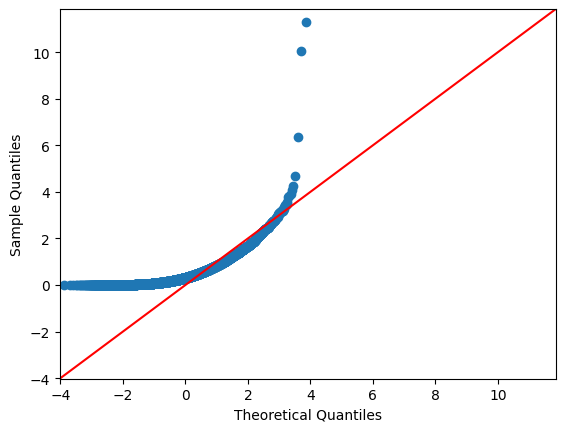

In [75]:
import statsmodels.api as sm
import scipy.stats as stats
import pylab

sm.qqplot(obs_negP, line='45')
pylab.show()

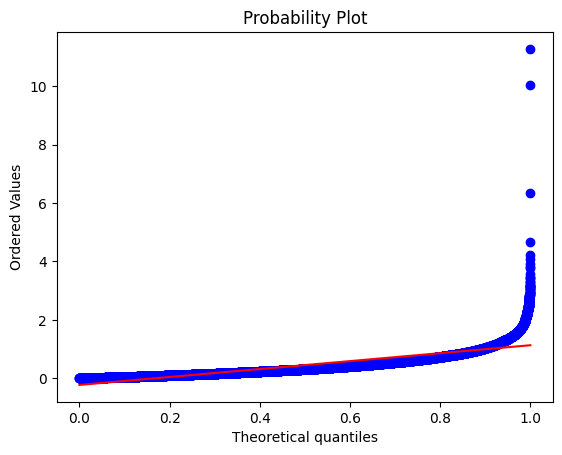

In [76]:
stats.probplot(obs_negP, dist = "uniform", plot = pylab)
pylab.show()

In [125]:
import statsmodels.api as sm



Plot for <code>PIP</code> values

In [126]:
pip_allchr22 = v.to_table()['PIP']
len(pip_allchr22)

18292

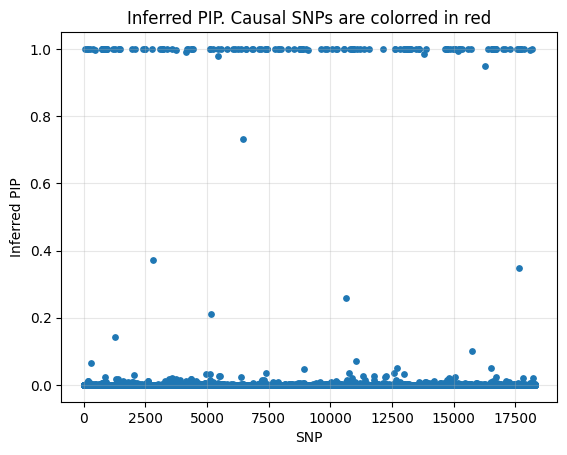

causal
blue: FALSE
red: TRUE


In [127]:
from scipy.ndimage import label
# use  inferred PIP calculated above
num_snp = len(pip_allchr22)

# show the plot pip about professors data
SNP_index_arr = np.arange(num_snp)
plt.scatter(SNP_index_arr, pip_allchr22, s=15)   #  c=causal_color, cmap='coolwarm'
plt.grid(which="major",alpha=0.3)
plt.xlabel("SNP")
plt.ylabel("Inferred PIP")
plt.title("Inferred PIP. Causal SNPs are colorred in red")
plt.show()
print("causal")
print("blue: FALSE")
print("red: TRUE")

<h3>Repeat training on ALL-chr22 10 times </h3>
The traininig funciton is in "data/utils/training.py", calculate r^2 on itself. 

> Reading BED file...
> Generating polygenic scores...
> Performing GWAS...


/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


> Reading BED file...
> Reading summary statistics file...
> Harmonizing data...
> Computing LD matrix...


/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/dask/array/routines.py:318: PerformanceWarning: Increasing number of chunks by factor of 18
  axes=(left_axes, right_axes),
/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


> Initializing model parameters
> Loading LD matrices into memory...
> Performing model fit...
> Using up to 1 threads.


 46%|████▋     | 463/1000 [04:27<05:09,  1.73it/s]

Converged at iteration 464 || ELBO: 11553.693881
> Final ELBO: 11553.693881
> Estimated heritability: 0.837031
> Estimated proportion of causal variants: 0.001000


> Generating polygenic scores...


Exception ignored in: <finalize object at 0x7f9684280830; dead>
Traceback (most recent call last):
  File "/usr/lib/python3.7/weakref.py", line 572, in __call__
    return info.func(*info.args, **(info.kwargs or {}))
  File "/usr/lib/python3.7/tempfile.py", line 934, in _cleanup
    _rmtree(name)
  File "/usr/lib/python3.7/shutil.py", line 485, in rmtree
    onerror(os.lstat, path, sys.exc_info())
  File "/usr/lib/python3.7/shutil.py", line 483, in rmtree
    orig_st = os.lstat(path)
FileNotFoundError: [Errno 2] No such file or directory: 'temp/ld_4kk5ujr0'


The  1  th simulation experiment,  the r^2 is  0.009481046909174225


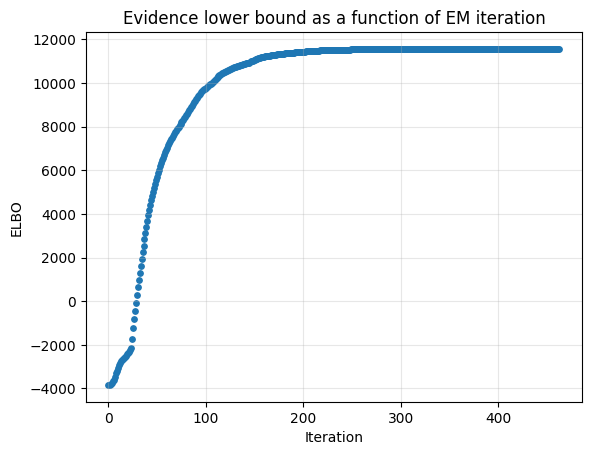

> Reading BED file...
> Generating polygenic scores...
> Performing GWAS...


/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


> Reading BED file...
> Reading summary statistics file...
> Harmonizing data...
> Computing LD matrix...


/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/dask/array/routines.py:318: PerformanceWarning: Increasing number of chunks by factor of 18
  axes=(left_axes, right_axes),
/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


KeyboardInterrupt: 

In [21]:

from data.utils.Simulate_training import *

chr22ALL_r2s = []
for i in range(1,11):
    R2, ELBO_list = train_chr22ALL()
    print("The ", i, " th simulation experiment, ", "the r^2 is ", R2)
    elbo_path = "ELBO_history_fig/chr22ALL_itr" + str(i) + ".png"
    ELBO_plot(ELBO_list, elbo_path, i)
    chr22ALL_r2s.append(R2)

<h3> July 2nd, shuffle 100 SNPs </h3>  
from "CMAll_qced/chr22/ALL_CM_chr22" to simulate and run viprs.

In [1]:
import numpy as np
import pandas as pd
import magenpy as mgp
import viprs as vp
from viprs.eval.metrics import r2 

Run shuffled 100SNPs on 2706 samples for 10 times. 

> Reading BED file...
> Generating polygenic scores...
> Performing GWAS...


/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


> Reading BED file...
> Reading summary statistics file...
> Harmonizing data...
> Computing LD matrix...
> Initializing model parameters
> Loading LD matrices into memory...
> Performing model fit...
> Using up to 1 threads.


  8%|▊         | 82/1000 [00:00<00:00, 1253.69it/s]

Converged at iteration 83 || ELBO: -2529.122573
> Final ELBO: -2529.122573
> Estimated heritability: 0.487798
> Estimated proportion of causal variants: 0.001000
> Generating polygenic scores...
The  1  th simulation experiment,  the r^2 is  0.07009262192104372



Exception ignored in: <finalize object at 0x7f71286d8160; dead>
Traceback (most recent call last):
  File "/usr/lib/python3.7/weakref.py", line 572, in __call__
    return info.func(*info.args, **(info.kwargs or {}))
  File "/usr/lib/python3.7/tempfile.py", line 934, in _cleanup
    _rmtree(name)
  File "/usr/lib/python3.7/shutil.py", line 485, in rmtree
    onerror(os.lstat, path, sys.exc_info())
  File "/usr/lib/python3.7/shutil.py", line 483, in rmtree
    orig_st = os.lstat(path)
FileNotFoundError: [Errno 2] No such file or directory: 'temp/ld_wun7ht5g'


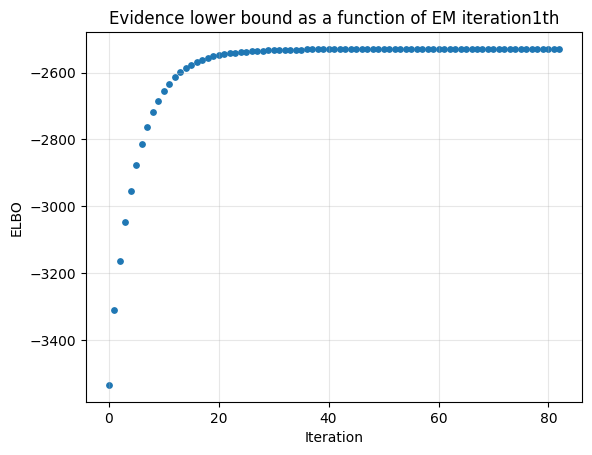

> Reading BED file...
> Generating polygenic scores...
> Performing GWAS...
> Reading BED file...


/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


> Reading summary statistics file...
> Harmonizing data...
> Computing LD matrix...
> Initializing model parameters
> Loading LD matrices into memory...
> Performing model fit...
> Using up to 1 threads.


  1%|          | 7/1000 [00:00<00:01, 929.35it/s]

Converged at iteration 8 || ELBO: -3827.498927
> Final ELBO: -3827.498927
> Estimated heritability: 0.015475
> Estimated proportion of causal variants: 0.001000
> Generating polygenic scores...
The  2  th simulation experiment,  the r^2 is  0.0071154730943316395



Exception ignored in: <finalize object at 0x7f712832f4d0; dead>
Traceback (most recent call last):
  File "/usr/lib/python3.7/weakref.py", line 572, in __call__
    return info.func(*info.args, **(info.kwargs or {}))
  File "/usr/lib/python3.7/tempfile.py", line 934, in _cleanup
    _rmtree(name)
  File "/usr/lib/python3.7/shutil.py", line 485, in rmtree
    onerror(os.lstat, path, sys.exc_info())
  File "/usr/lib/python3.7/shutil.py", line 483, in rmtree
    orig_st = os.lstat(path)
FileNotFoundError: [Errno 2] No such file or directory: 'temp/ld_c1ua_84p'


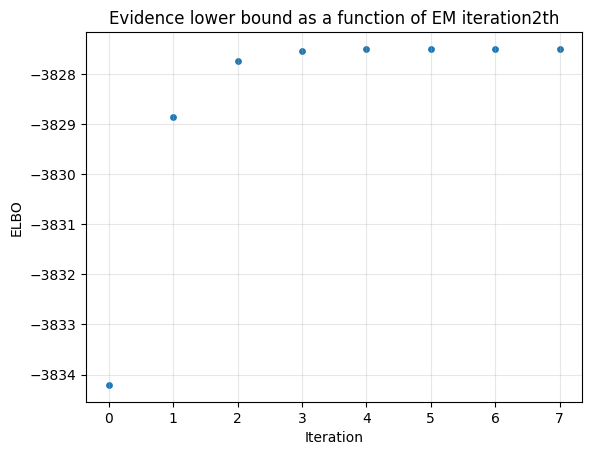

> Reading BED file...
> Generating polygenic scores...
> Performing GWAS...


/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


> Reading BED file...
> Reading summary statistics file...
> Harmonizing data...
> Computing LD matrix...
> Initializing model parameters
> Loading LD matrices into memory...
> Performing model fit...
> Using up to 1 threads.


  4%|▎         | 37/1000 [00:00<00:00, 1249.82it/s]

Converged at iteration 38 || ELBO: -3471.419032
> Final ELBO: -3471.419032
> Estimated heritability: 0.225111
> Estimated proportion of causal variants: 0.001000
> Generating polygenic scores...
The  3  th simulation experiment,  the r^2 is  0.041820801159614326



Exception ignored in: <finalize object at 0x7f7140243830; dead>
Traceback (most recent call last):
  File "/usr/lib/python3.7/weakref.py", line 572, in __call__
    return info.func(*info.args, **(info.kwargs or {}))
  File "/usr/lib/python3.7/tempfile.py", line 934, in _cleanup
    _rmtree(name)
  File "/usr/lib/python3.7/shutil.py", line 485, in rmtree
    onerror(os.lstat, path, sys.exc_info())
  File "/usr/lib/python3.7/shutil.py", line 483, in rmtree
    orig_st = os.lstat(path)
FileNotFoundError: [Errno 2] No such file or directory: 'temp/ld_dnaevjgc'


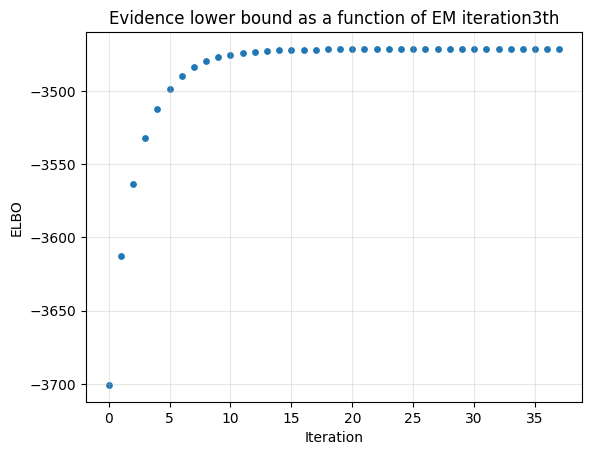

> Reading BED file...
> Generating polygenic scores...
> Performing GWAS...


/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


> Reading BED file...
> Reading summary statistics file...
> Harmonizing data...
> Computing LD matrix...
> Initializing model parameters
> Loading LD matrices into memory...
> Performing model fit...
> Using up to 1 threads.


  8%|▊         | 85/1000 [00:00<00:00, 1303.82it/s]

Converged at iteration 86 || ELBO: -2327.107931
> Final ELBO: -2327.107931
> Estimated heritability: 0.514306
> Estimated proportion of causal variants: 0.001000
> Generating polygenic scores...
The  4  th simulation experiment,  the r^2 is  0.029354547293847837



Exception ignored in: <finalize object at 0x7f7140243c50; dead>
Traceback (most recent call last):
  File "/usr/lib/python3.7/weakref.py", line 572, in __call__
    return info.func(*info.args, **(info.kwargs or {}))
  File "/usr/lib/python3.7/tempfile.py", line 934, in _cleanup
    _rmtree(name)
  File "/usr/lib/python3.7/shutil.py", line 485, in rmtree
    onerror(os.lstat, path, sys.exc_info())
  File "/usr/lib/python3.7/shutil.py", line 483, in rmtree
    orig_st = os.lstat(path)
FileNotFoundError: [Errno 2] No such file or directory: 'temp/ld_gdw42mte'


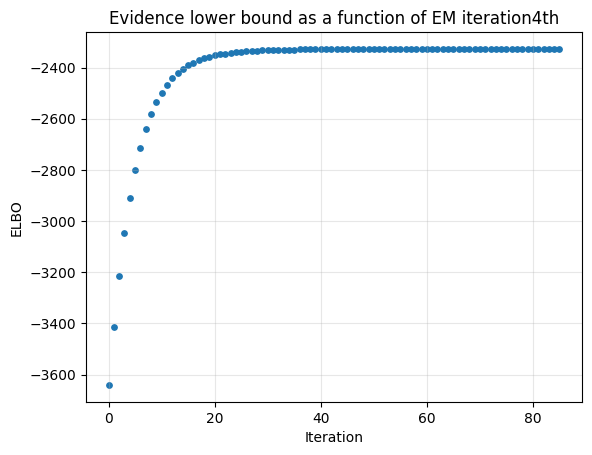

> Reading BED file...
> Generating polygenic scores...
> Performing GWAS...
> Reading BED file...


/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


> Reading summary statistics file...
> Harmonizing data...
> Computing LD matrix...
> Initializing model parameters
> Loading LD matrices into memory...
> Performing model fit...
> Using up to 1 threads.


  3%|▎         | 33/1000 [00:00<00:00, 1256.52it/s]

Converged at iteration 34 || ELBO: -3213.307636
> Final ELBO: -3213.307636
> Estimated heritability: 0.324966
> Estimated proportion of causal variants: 0.001000
> Generating polygenic scores...
The  5  th simulation experiment,  the r^2 is  0.09127466282445186



Exception ignored in: <finalize object at 0x7f71401f36f0; dead>
Traceback (most recent call last):
  File "/usr/lib/python3.7/weakref.py", line 572, in __call__
    return info.func(*info.args, **(info.kwargs or {}))
  File "/usr/lib/python3.7/tempfile.py", line 934, in _cleanup
    _rmtree(name)
  File "/usr/lib/python3.7/shutil.py", line 485, in rmtree
    onerror(os.lstat, path, sys.exc_info())
  File "/usr/lib/python3.7/shutil.py", line 483, in rmtree
    orig_st = os.lstat(path)
FileNotFoundError: [Errno 2] No such file or directory: 'temp/ld_l62h9q4h'


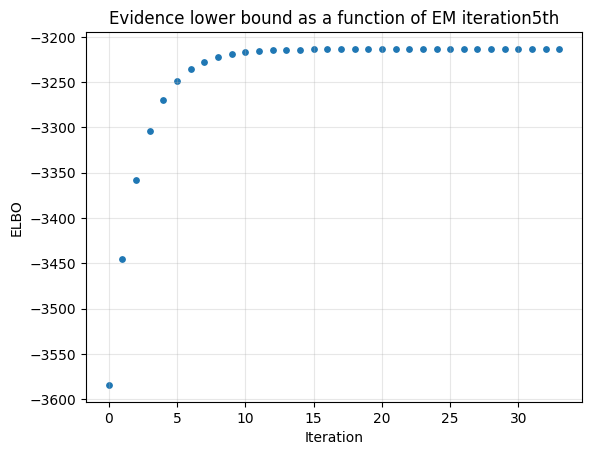

> Reading BED file...
> Generating polygenic scores...
> Performing GWAS...
> Reading BED file...
> Reading summary statistics file...
> Harmonizing data...


/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


> Computing LD matrix...
> Initializing model parameters
> Loading LD matrices into memory...
> Performing model fit...
> Using up to 1 threads.


  1%|▏         | 13/1000 [00:00<00:00, 1222.72it/s]

Converged at iteration 14 || ELBO: -2901.738395
> Final ELBO: -2901.738395
> Estimated heritability: 0.411753
> Estimated proportion of causal variants: 0.001000
> Generating polygenic scores...
The  6  th simulation experiment,  the r^2 is  0.4037020827646278



Exception ignored in: <finalize object at 0x7f71401f3260; dead>
Traceback (most recent call last):
  File "/usr/lib/python3.7/weakref.py", line 572, in __call__
    return info.func(*info.args, **(info.kwargs or {}))
  File "/usr/lib/python3.7/tempfile.py", line 934, in _cleanup
    _rmtree(name)
  File "/usr/lib/python3.7/shutil.py", line 485, in rmtree
    onerror(os.lstat, path, sys.exc_info())
  File "/usr/lib/python3.7/shutil.py", line 483, in rmtree
    orig_st = os.lstat(path)
FileNotFoundError: [Errno 2] No such file or directory: 'temp/ld_2wid5i6l'


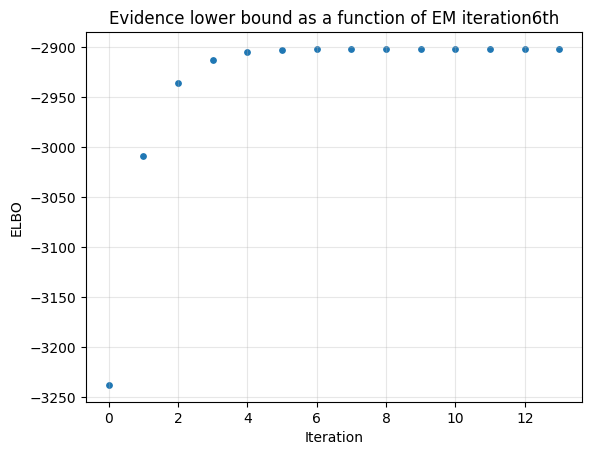

> Reading BED file...
> Generating polygenic scores...
> Performing GWAS...
> Reading BED file...
> Reading summary statistics file...


/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


> Harmonizing data...
> Computing LD matrix...
> Initializing model parameters
> Loading LD matrices into memory...
> Performing model fit...
> Using up to 1 threads.


  1%|          | 9/1000 [00:00<00:00, 1179.21it/s]

Converged at iteration 10 || ELBO: -3130.161583
> Final ELBO: -3130.161583
> Estimated heritability: 0.350439
> Estimated proportion of causal variants: 0.001000
> Generating polygenic scores...
The  7  th simulation experiment,  the r^2 is  0.34611129240150285



Exception ignored in: <finalize object at 0x7f71401f3520; dead>
Traceback (most recent call last):
  File "/usr/lib/python3.7/weakref.py", line 572, in __call__
    return info.func(*info.args, **(info.kwargs or {}))
  File "/usr/lib/python3.7/tempfile.py", line 934, in _cleanup
    _rmtree(name)
  File "/usr/lib/python3.7/shutil.py", line 485, in rmtree
    onerror(os.lstat, path, sys.exc_info())
  File "/usr/lib/python3.7/shutil.py", line 483, in rmtree
    orig_st = os.lstat(path)
FileNotFoundError: [Errno 2] No such file or directory: 'temp/ld_z7vxrco0'


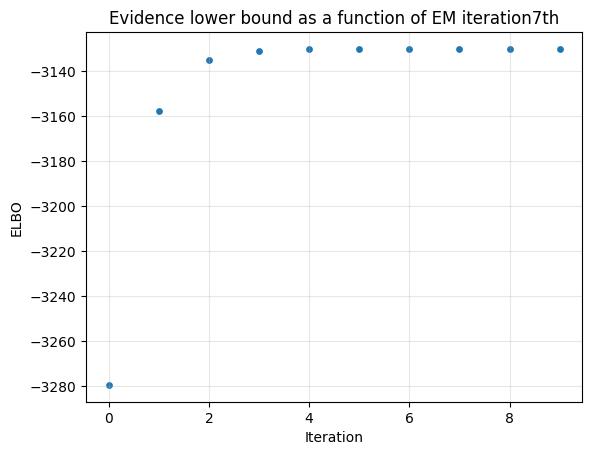

> Reading BED file...
> Generating polygenic scores...
> Performing GWAS...
> Reading BED file...
> Reading summary statistics file...


/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


> Harmonizing data...
> Computing LD matrix...
> Initializing model parameters
> Loading LD matrices into memory...
> Performing model fit...
> Using up to 1 threads.


  3%|▎         | 33/1000 [00:00<00:00, 1240.99it/s]

Converged at iteration 34 || ELBO: -3628.750809
> Final ELBO: -3628.750809
> Estimated heritability: 0.144798
> Estimated proportion of causal variants: 0.001000
> Generating polygenic scores...
The  8  th simulation experiment,  the r^2 is  0.024407556577139354



Exception ignored in: <finalize object at 0x7f7140243e40; dead>
Traceback (most recent call last):
  File "/usr/lib/python3.7/weakref.py", line 572, in __call__
    return info.func(*info.args, **(info.kwargs or {}))
  File "/usr/lib/python3.7/tempfile.py", line 934, in _cleanup
    _rmtree(name)
  File "/usr/lib/python3.7/shutil.py", line 485, in rmtree
    onerror(os.lstat, path, sys.exc_info())
  File "/usr/lib/python3.7/shutil.py", line 483, in rmtree
    orig_st = os.lstat(path)
FileNotFoundError: [Errno 2] No such file or directory: 'temp/ld_1id05io1'


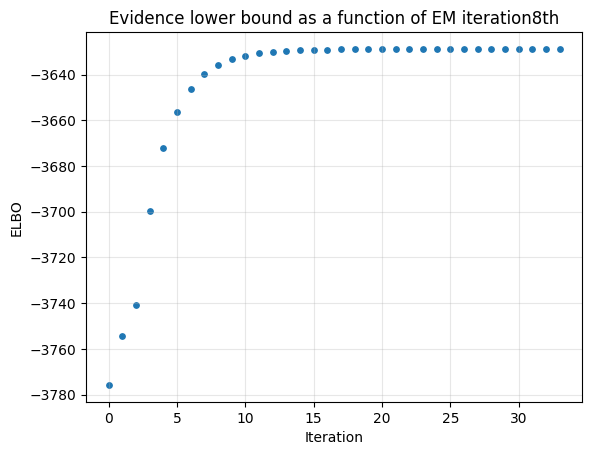

> Reading BED file...
> Generating polygenic scores...
> Performing GWAS...


/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


> Reading BED file...
> Reading summary statistics file...
> Harmonizing data...
> Computing LD matrix...
> Initializing model parameters
> Loading LD matrices into memory...
> Performing model fit...
> Using up to 1 threads.


  2%|▎         | 25/1000 [00:00<00:00, 1242.36it/s]

Converged at iteration 26 || ELBO: -3407.639274
> Final ELBO: -3407.639274
> Estimated heritability: 0.249763
> Estimated proportion of causal variants: 0.001000
> Generating polygenic scores...
The  9  th simulation experiment,  the r^2 is  0.02943436679613103



Exception ignored in: <finalize object at 0x7f7140243bf0; dead>
Traceback (most recent call last):
  File "/usr/lib/python3.7/weakref.py", line 572, in __call__
    return info.func(*info.args, **(info.kwargs or {}))
  File "/usr/lib/python3.7/tempfile.py", line 934, in _cleanup
    _rmtree(name)
  File "/usr/lib/python3.7/shutil.py", line 485, in rmtree
    onerror(os.lstat, path, sys.exc_info())
  File "/usr/lib/python3.7/shutil.py", line 483, in rmtree
    orig_st = os.lstat(path)
FileNotFoundError: [Errno 2] No such file or directory: 'temp/ld__rk7m0da'


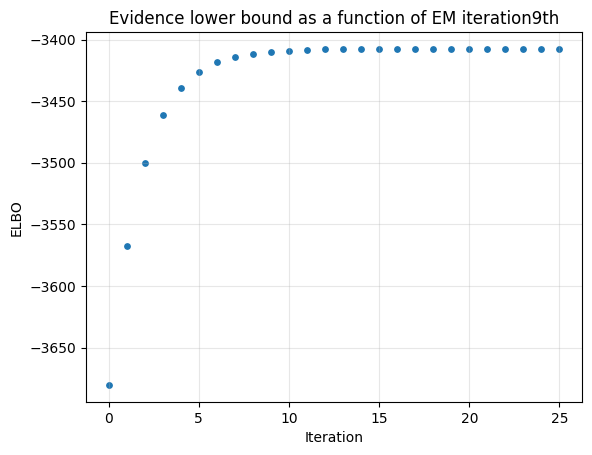

> Reading BED file...
> Generating polygenic scores...
> Performing GWAS...
> Reading BED file...
> Reading summary statistics file...
> Harmonizing data...
> Computing LD matrix...


/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


> Initializing model parameters
> Loading LD matrices into memory...
> Performing model fit...
> Using up to 1 threads.


  8%|▊         | 80/1000 [00:00<00:00, 1301.80it/s]

Converged at iteration 81 || ELBO: -3188.908910
> Final ELBO: -3188.908910
> Estimated heritability: 0.321349
> Estimated proportion of causal variants: 0.001000
> Generating polygenic scores...
The  10  th simulation experiment,  the r^2 is  0.004457881964859239



Exception ignored in: <finalize object at 0x7f71287db0b0; dead>
Traceback (most recent call last):
  File "/usr/lib/python3.7/weakref.py", line 572, in __call__
    return info.func(*info.args, **(info.kwargs or {}))
  File "/usr/lib/python3.7/tempfile.py", line 934, in _cleanup
    _rmtree(name)
  File "/usr/lib/python3.7/shutil.py", line 485, in rmtree
    onerror(os.lstat, path, sys.exc_info())
  File "/usr/lib/python3.7/shutil.py", line 483, in rmtree
    orig_st = os.lstat(path)
FileNotFoundError: [Errno 2] No such file or directory: 'temp/ld_n83gnn7x'


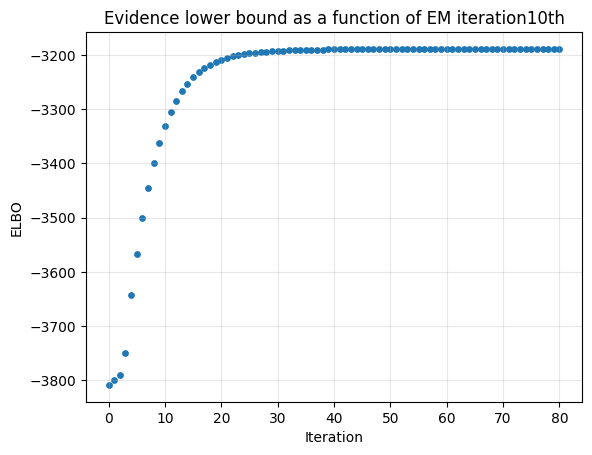

In [69]:

from data.utils.Simulate_training import train_chr22_100SNPs

shuffle100_r2s = []
for i in range(1,11):
    R2, ELBO_list = train_chr22_100SNPs()
    print("The ", i, " th simulation experiment, ", "the r^2 is ", R2)
    elbo_path = "ELBO_history_fig/shuffled100_itr" + str(i) + ".png"
    ELBO_plot(ELBO_list, elbo_path, itr=i)
    shuffle100_r2s.append(R2)

# calcuate the mean of r2   


# ELBO_plot(ELBO_list, "ELBO_history_fig/test_shuffled100SNPs.png")

In [70]:
shuffle100_r2s

[0.07009262192104372,
 0.0071154730943316395,
 0.041820801159614326,
 0.029354547293847837,
 0.09127466282445186,
 0.4037020827646278,
 0.34611129240150285,
 0.024407556577139354,
 0.02943436679613103,
 0.004457881964859239]

In [71]:
# the mean of shuffled 100 SNPS training on 2706 samples
print("training times:", len(shuffle100_r2s))
sum(shuffle100_r2s)/len(shuffle100_r2s)

training times: 10


0.10477712867975497

<h5> Run Once on chr22 shuffled 100 SNPs with 2706 samples. </h5>

In [15]:
g_sim = mgp.GWASimulator("CMAll_qced/chr22/shuffle_100snps",
                            pi = [.99, .01],
                            h2=0.5)
g_sim.simulate()
g_sim.to_phenotype_table()

> Reading BED file...
> Generating polygenic scores...


,FID,IID,phenotype
0,0,1000,-0.063773
1,0,2000,-0.722293
2,0,3000,0.488350
3,0,4000,-0.488011
4,0,5000,0.127948
...,...,...,...
2701,0,3061000,-0.328640
2702,0,3062000,0.663065
2703,0,3064000,-0.290843
2704,0,3065000,0.632165


In [17]:
g_sim.perform_gwas()
g_sim.to_summary_statistics_table().to_csv(
    "Toy_example_expr/shuffle_100snps.sumstats", sep="\t", index=False
)

> Performing GWAS...


/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


In [2]:
# Load summary statistics（simulate phenotype from above) and match them with perviously
gdl_sim = mgp.GWADataLoader(bed_files="CMAll_qced/chr22/shuffle_100snps",
                            sumstats_files="Toy_example_expr/shuffle_100snps.sumstats",
                            sumstats_format="magenpy")

> Reading BED file...
> Reading summary statistics file...
> Harmonizing data...


In [3]:
gdl_sim.compute_ld(estimator='sample',
                   output_dir='Toy_example_expr/shuffle100_chr22_out/')

# gdl_sim.compute_ld(estimator='windowed',
#                    output_dir='Toy_example_expr/ALLchr22_out/windowed/',
#                    window_size=100)

> Computing LD matrix...


/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


Use viprs on suffle selected 100 SNPs

In [4]:
# viprs
v = vp.VIPRS(gdl_sim, fix_params={'pi': 0.001, 'sigma_epsilon': 0.999})

In [12]:
v.fit()

> Initializing model parameters
> Loading LD matrices into memory...
> Performing model fit...
> Using up to 1 threads.


  0%|          | 5/1000 [00:00<00:01, 862.64it/s]

Converged at iteration 6 || ELBO: -3751.421849
> Final ELBO: -3751.421849
> Estimated heritability: 0.067630
> Estimated proportion of causal variants: 0.001000


<code>Validation</code> on the same shuffled 100 SNPs data but different phenotypes

In [31]:
# #simulate 
# g2_sim = mgp.GWASimulator("CMdream1/chr22/d1CM22_sorted",
#                          pi = [.99, .01],
#                          h2=0.5)
# g2_sim.simulate()
# a = g2_sim.to_phenotype_table()
# a.to_csv("Toy_example_expr/phenotype/g2_sim_pheno.txt",sep='\t', index=False, header=False)
# g2_sim.perform_gwas()
# g2_sim.to_summary_statistics_table().to_csv(
#     "Toy_example_expr/d1CM22_sorted_valid.sumstats", sep="\t", index=False
# )

# # Load summary statistics（simulate phenotype from above) and match them with perviously
# gdl2_sim = mgp.GWADataLoader(bed_files="CMdream1/chr22/d1CM22_sorted",
#                             phenotype_file="Toy_example_expr/phenotype/g2_sim_pheno.txt",
#                             sumstats_files="Toy_example_expr/d1CM22_sorted_valid.sumstats",
#                             sumstats_format="magenpy")
# gdl2_sim.compute_ld(estimator='sample',
#                    output_dir='Toy_example_expr/out/ld_val/')
g_sim.to_phenotype_table().to_csv("Toy_example_expr/phenotype/shuffle100_phe.txt",sep='\t', index=False, header=False)



In [13]:
val_prs = v.predict(gdl_sim)

> Generating polygenic scores...


In [15]:
from viprs.eval.metrics import r2 
r2(val_prs, gdl_sim.sample_table.phenotype)

KeyError: 'The phenotype is not set!'

<h3> July 8th, genomic control (GC) factor</h3> 
It is better if GC factor is close to 1,  
if it is over 1, which means global inflation. 


In [7]:
import numpy as np
from scipy.stats import chi2
def calculate_lambda(p_values):
    # Calculate the genomic inflation factor (λ)
    observed_chi2 = -2 * np.log(p_values)
    lambda_gc = np.median(observed_chi2) / chi2.ppf(0.5, 1)
    return lambda_gc

In [8]:
# read the sumstats file and extract column of P-values
All_22_sum = pd.read_csv("Toy_example_expr/ALL_CM22.sumstats", sep="\t" )
p_values = All_22_sum['PVAL']

# calculate GC factor
gc = calculate_lambda(p_values)
print("GC: ", gc)

GC:  3.3288331146299783


<h5> LD regression 算 interval 是否有inflation (应该感觉inflation 是非常大的) </h5>   

1. Store gwas and LD for all chr22 into <code> .txt files </code>.  
2. Read <code> LD results of "sample" estimator</code> for ALL_chr22, which is a SNPs * SNPs LD.  
Then store it into a .csv file and dataframe.

** 但是由于之前已经看见问题十分严重，可以看得出来inflation 挺严重的，cofounder effect possibly due to age/sex/DAS score

In [78]:
# For ALL chr22 (2706 individuals) （use around 20mins to store!)
# store gwas summary statistics into .txt
gwas_All22_sums = pd.read_csv("Toy_example_expr/ALL_CM22.sumstats", sep="\t" )
gwas_All22_sums = gwas_All22_sums.to_csv("Toy_example_expr/ALL22_LDregression/gwas_All22_sums.csv", index=False, sep="\t")

# store LD
All22_LD = mgp.LDMatrix.from_path('Toy_example_expr/ALLchr22_out/ld/chr_22')
pd.DataFrame(All22_LD.z_array).to_csv("Toy_example_expr/ALL22_LDregression/All22_sample_ld.csv", index=False, sep="\t")

In [2]:
# Set paths to LD scores and GWAS summary statistics CSV files
ld_scores_file = "Toy_example_expr/ALL22_LDregression/All22_sample_ld.csv"
gwas_sumstats_file = "Toy_example_expr/ALL22_LDregression/gwas_All22_sums.csv"
# Run LD score regression using ldsc.py
ldsc_command = f"ldsc.py --h2 {gwas_sumstats_file} --ref-ld-chr {ld_scores_file} --w-ld-chr {ld_scores_file} --out output_results"
subprocess.run(ldsc_command, shell=True)

*********************************************************************
* LD Score Regression (LDSC)
* Version 2.0.0
* (C) 2014-2019 Brendan Bulik-Sullivan and Hilary Finucane
* Broad Institute of MIT and Harvard / MIT Department of Mathematics
* GNU General Public License v3
*********************************************************************
Call: 
./ldsc.py \
--out output_results \
--h2 Toy_example_expr/ALL22_LDregression/gwas_All22_sums.csv \
--ref-ld-chr Toy_example_expr/ALL22_LDregression/All22_sample_ld.csv \
--w-ld-chr Toy_example_expr/ALL22_LDregression/All22_sample_ld.csv 

Beginning analysis at Sat Jul  8 18:00:14 2023
Reading summary statistics from Toy_example_expr/ALL22_LDregression/gwas_All22_sums.csv ...
Read summary statistics for 18292 SNPs.
Reading reference panel LD Score from Toy_example_expr/ALL22_LDregression/All22_sample_ld.csv[1-22] ... (ldscore_fromlist)
Analysis finished at Sat Jul  8 18:00:14 2023
Total time elapsed: 0.07s


Traceback (most recent call last):
  File "/home/mcb/users/yzhu439/RA_Project/.venv/bin/ldsc.py", line 645, in <module>
    sumstats.estimate_h2(args, log)
  File "/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.10/site-packages/ldscore/sumstats.py", line 325, in estimate_h2
    M_annot, w_ld_cname, ref_ld_cnames, sumstats, novar_cols = _read_ld_sumstats(
  File "/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.10/site-packages/ldscore/sumstats.py", line 243, in _read_ld_sumstats
    ref_ld = _read_ref_ld(args, log)
  File "/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.10/site-packages/ldscore/sumstats.py", line 81, in _read_ref_ld
    ref_ld = _read_chr_split_files(args.ref_ld_chr, args.ref_ld, log,
  File "/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.10/site-packages/ldscore/sumstats.py", line 152, in _read_chr_split_files
    out = parsefunc(_splitp(chr_arg), _N_CHR, **kwargs)
  File "/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.10/site-packages/ldsco

CompletedProcess(args='ldsc.py --h2 Toy_example_expr/ALL22_LDregression/gwas_All22_sums.csv --ref-ld-chr Toy_example_expr/ALL22_LDregression/All22_sample_ld.csv --w-ld-chr Toy_example_expr/ALL22_LDregression/All22_sample_ld.csv --out output_results', returncode=1)

In [ ]:
# # Convert GWAS summary statistics DataFrame to text
# gwas_All22_sums = pd.read_csv("Toy_example_expr/ALL_CM22.sumstats", sep="\t" )
# gwas_sumstats_df = pd.DataFrame(...)  # Replace with your GWAS summary statistics DataFrame
# gwas_sumstats_text = gwas_sumstats_df.to_csv(index=False, sep="\t")
# # Convert LD scores DataFrame to text
# ld_scores_df = pd.DataFrame(...)  # Replace with your LD scores DataFrame
# ld_scores_text = ld_scores_df.to_csv(index=False, sep="\t")
# # Run LD score regression using LDSC
# ldsc_command = "ldsc.py --h2-cts stdin --ref-ld-chr stdin --w-ld-chr stdin --out output_results"
# ldsc_process = subprocess.run(ldsc_command, input=gwas_sumstats_text, input_encoding='utf-8', shell=True, capture_output=True, text=True)
# output = ldsc_process.stdout
# # Load the LDSC regression results from the output
# ldsc_results = pd.read_csv(io.StringIO(output), sep="\t")
# # Print the regression results
# print(ldsc_results)

<h3> Add Covariates_files to GWASLoader </h3>, July 9th. 
Then run it. 

In [72]:
#simulate 
g_sim = mgp.GWASimulator("CMAll_qced/chr22/ALL_CM_chr22",
                         pi = [.99, .01],
                         h2=0.5)
g_sim.simulate()
g_sim.to_phenotype_table().to_csv("Toy_example_expr/phenotype/AddCovari_phe.csv",sep='\t', index=False)
g_sim.to_phenotype_table()

> Reading BED file...
> Generating polygenic scores...


,FID,IID,phenotype
0,0,1000,3.045674
1,0,2000,0.508501
2,0,3000,-0.643129
3,0,4000,0.066748
4,0,5000,0.405049
...,...,...,...
2701,0,3061000,0.319219
2702,0,3062000,0.556563
2703,0,3064000,0.084124
2704,0,3065000,-0.765943


In [73]:
g_sim.perform_gwas()
g_sim.to_summary_statistics_table().to_csv(
    "Toy_example_expr/ALL_CM22.sumstats", sep="\t", index=False
)

> Performing GWAS...


/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


In [74]:
# Load summary statistics（simulate phenotype from above) and match them with perviously
gdl_sim = mgp.GWADataLoader(bed_files="CMAll_qced/chr22/ALL_CM_chr22",
                            phenotype_file="Toy_example_expr/phenotype/AddCovari_phe.csv",
                            covariates_file="data/Dosage_for_PCA/chr22_covariates.csv",
                            )
# sumstats_files="Toy_example_expr/ALL_CM22.sumstats",
#                             sumstats_format="magenpy"

> Reading BED file...
> Reading phenotype file...
> Reading covariates file...


In [75]:
gdl_sim.perform_gwas()
gdl_sim.to_summary_statistics_table().to_csv(
    "Toy_example_expr/ALL_CM22_withCov.sumstats",
    sep="\t", index=False,
)

> Performing GWAS...


/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


In [76]:
gdl_sim.compute_ld(estimator='sample',
                   output_dir='Toy_example_expr/ALLchr22_out/')

# gdl_sim.compute_ld(estimator='windowed',
#                    output_dir='Toy_example_expr/ALLchr22_out/windowed/',
#                    window_size=100)

> Computing LD matrix...


/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/dask/array/routines.py:318: PerformanceWarning: Increasing number of chunks by factor of 18
  axes=(left_axes, right_axes),
/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


viprs on gdl_sim, with covariates_file for chr22 with samples 2706

In [77]:
v = vp.VIPRS(gdl_sim, fix_params={'pi': 0.001, 'sigma_epsilon': 0.999})

In [78]:
v.fit()

> Initializing model parameters
> Loading LD matrices into memory...


> Performing model fit...
> Using up to 1 threads.


 12%|█▏        | 121/1000 [01:10<08:30,  1.72it/s]

Converged at iteration 122 || ELBO: -3320.776293
> Final ELBO: -3320.776293
> Estimated heritability: 0.329351
> Estimated proportion of causal variants: 0.001000


In [ ]:
ELBO_plot(v.history['ELBO'], "ELBO_history_fig/chr22ALL_itr1.png", 1)

In [79]:
prs_chr22 = v.predict(gdl_sim)
prs_chr22

> Generating polygenic scores...


array([ 1.65610868,  0.47625686,  1.60497883, ...,  0.16586676,
       -0.28298392,  0.12205657])

In [80]:
g_sim.sample_table.phenotype.shape

(2706,)

In [82]:
prs_chr22.shape

(2705,)

In [83]:
from viprs.eval.metrics import r2
r2(prs_chr22, gdl_sim.sample_table.phenotype)

0.04969731549005308

<h3> Try for shuffled 100 SNPs again </h3> 
if directly input .sumstats and covariates_file into <code> GWASLoader </code>, it seems the perform_gwas haven't been corrected by our covariates_file. 

Now, July 12th, we try to run chr22_ALL with 100 SNPs, and add the <code> covariates_file </code>. After additng this correcting covariates, and then run <code> perform_gwas() </code> to create the <code> new .sumstats file </code>. Here we still use pi=[0.99, 0.01] and h2=0.5. Because we want to compare with the result before <code> without the covariates_file. </code>

Since in the begaining, we computed gaws just after simuating, and then loaded the .sumstats file into new gdl_sim model. Then the <code> phenotype info. is already contained</code> in the **.sumstats file**. 

> Reading BED file...
> Generating polygenic scores...
> Reading BED file...
> Reading phenotype file...
> Reading covariates file...
> Performing GWAS...


/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


> Computing LD matrix...
> Initializing model parameters
> Loading LD matrices into memory...
> Performing model fit...
> Using up to 1 threads.


  2%|▏         | 19/1000 [00:00<00:00, 1210.77it/s]

Converged at iteration 20 || ELBO: -3419.725366
> Final ELBO: -3419.725366
> Estimated heritability: 0.248499
> Estimated proportion of causal variants: 0.001000
> Generating polygenic scores...
The  1  th simulation experiment,  the r^2 is  0.11275010366766634



Exception ignored in: <finalize object at 0x7f7140243bb0; dead>
Traceback (most recent call last):
  File "/usr/lib/python3.7/weakref.py", line 572, in __call__
    return info.func(*info.args, **(info.kwargs or {}))
  File "/usr/lib/python3.7/tempfile.py", line 934, in _cleanup
    _rmtree(name)
  File "/usr/lib/python3.7/shutil.py", line 485, in rmtree
    onerror(os.lstat, path, sys.exc_info())
  File "/usr/lib/python3.7/shutil.py", line 483, in rmtree
    orig_st = os.lstat(path)
FileNotFoundError: [Errno 2] No such file or directory: 'temp/ld_9cc4h563'


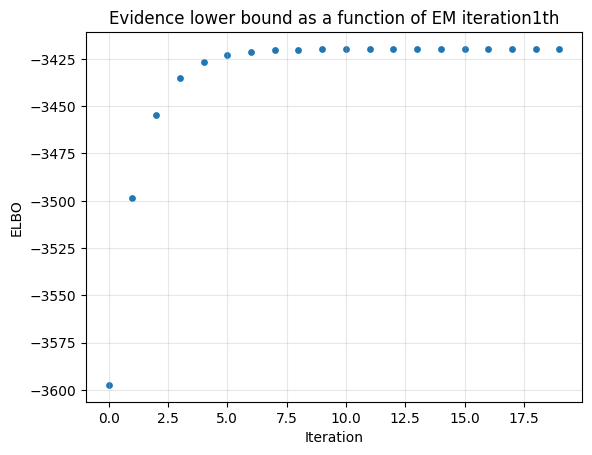

> Reading BED file...
> Generating polygenic scores...
> Reading BED file...
> Reading phenotype file...
> Reading covariates file...
> Performing GWAS...


/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


> Computing LD matrix...
> Initializing model parameters
> Loading LD matrices into memory...
> Performing model fit...
> Using up to 1 threads.


  3%|▎         | 27/1000 [00:00<00:00, 1193.07it/s]

Converged at iteration 28 || ELBO: -3414.141412
> Final ELBO: -3414.141412
> Estimated heritability: 0.251134
> Estimated proportion of causal variants: 0.001000
> Generating polygenic scores...
The  2  th simulation experiment,  the r^2 is  0.08483403170470893



Exception ignored in: <finalize object at 0x7f71402430b0; dead>
Traceback (most recent call last):
  File "/usr/lib/python3.7/weakref.py", line 572, in __call__
    return info.func(*info.args, **(info.kwargs or {}))
  File "/usr/lib/python3.7/tempfile.py", line 934, in _cleanup
    _rmtree(name)
  File "/usr/lib/python3.7/shutil.py", line 485, in rmtree
    onerror(os.lstat, path, sys.exc_info())
  File "/usr/lib/python3.7/shutil.py", line 483, in rmtree
    orig_st = os.lstat(path)
FileNotFoundError: [Errno 2] No such file or directory: 'temp/ld_c5p0qeil'


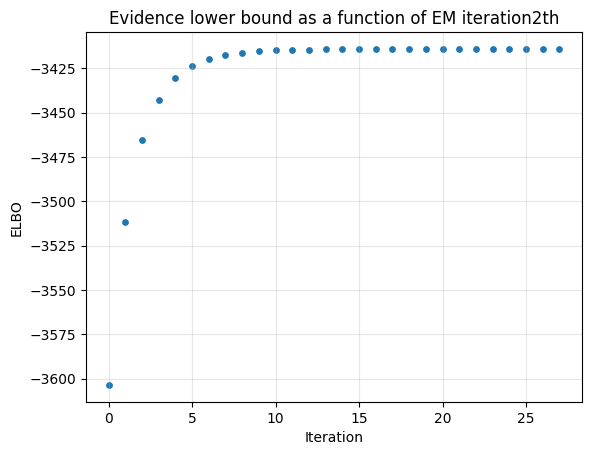

> Reading BED file...
> Generating polygenic scores...
> Reading BED file...
> Reading phenotype file...
> Reading covariates file...
> Performing GWAS...


/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


> Computing LD matrix...
> Initializing model parameters
> Loading LD matrices into memory...
> Performing model fit...
> Using up to 1 threads.


  3%|▎         | 31/1000 [00:00<00:00, 1160.74it/s]

Converged at iteration 32 || ELBO: -3543.535784
> Final ELBO: -3543.535784
> Estimated heritability: 0.188108
> Estimated proportion of causal variants: 0.001000
> Generating polygenic scores...
The  3  th simulation experiment,  the r^2 is  0.024307029194768986



Exception ignored in: <finalize object at 0x7f71401f3f50; dead>
Traceback (most recent call last):
  File "/usr/lib/python3.7/weakref.py", line 572, in __call__
    return info.func(*info.args, **(info.kwargs or {}))
  File "/usr/lib/python3.7/tempfile.py", line 934, in _cleanup
    _rmtree(name)
  File "/usr/lib/python3.7/shutil.py", line 485, in rmtree
    onerror(os.lstat, path, sys.exc_info())
  File "/usr/lib/python3.7/shutil.py", line 483, in rmtree
    orig_st = os.lstat(path)
FileNotFoundError: [Errno 2] No such file or directory: 'temp/ld__6xp11yw'


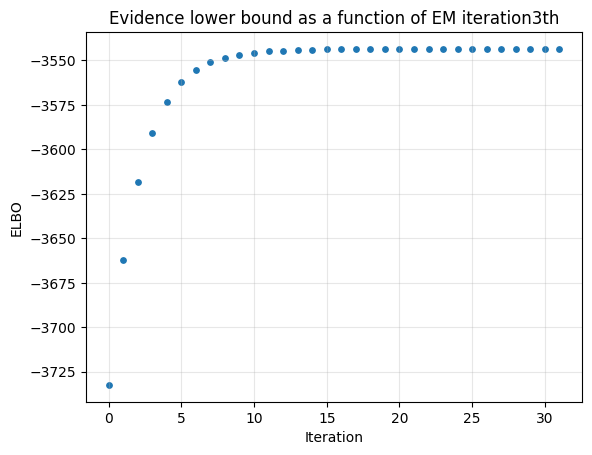

> Reading BED file...
> Generating polygenic scores...
> Reading BED file...
> Reading phenotype file...
> Reading covariates file...
> Performing GWAS...


/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


> Computing LD matrix...
> Initializing model parameters
> Loading LD matrices into memory...
> Performing model fit...
> Using up to 1 threads.


  7%|▋         | 66/1000 [00:00<00:00, 1277.84it/s]

Converged at iteration 67 || ELBO: -2896.950302
> Final ELBO: -2896.950302
> Estimated heritability: 0.403959
> Estimated proportion of causal variants: 0.001000
> Generating polygenic scores...
The  4  th simulation experiment,  the r^2 is  0.019005276846843416



Exception ignored in: <finalize object at 0x7f71401f3080; dead>
Traceback (most recent call last):
  File "/usr/lib/python3.7/weakref.py", line 572, in __call__
    return info.func(*info.args, **(info.kwargs or {}))
  File "/usr/lib/python3.7/tempfile.py", line 934, in _cleanup
    _rmtree(name)
  File "/usr/lib/python3.7/shutil.py", line 485, in rmtree
    onerror(os.lstat, path, sys.exc_info())
  File "/usr/lib/python3.7/shutil.py", line 483, in rmtree
    orig_st = os.lstat(path)
FileNotFoundError: [Errno 2] No such file or directory: 'temp/ld_dddi8faj'


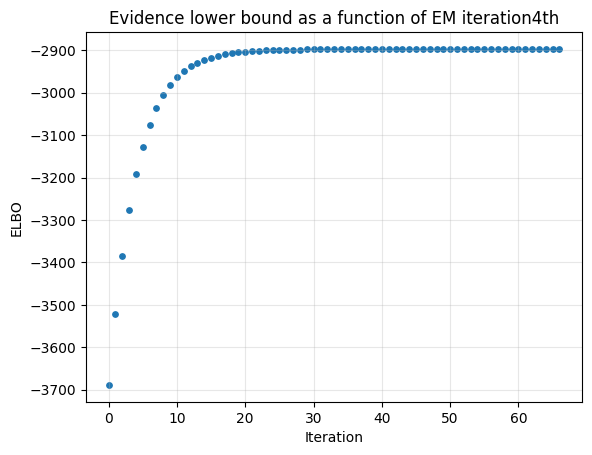

> Reading BED file...
> Generating polygenic scores...
> Reading BED file...
> Reading phenotype file...
> Reading covariates file...
> Performing GWAS...


/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


> Computing LD matrix...
> Initializing model parameters
> Loading LD matrices into memory...
> Performing model fit...
> Using up to 1 threads.


  9%|▉         | 89/1000 [00:00<00:00, 1296.39it/s]

Converged at iteration 90 || ELBO: -1768.726288
> Final ELBO: -1768.726288
> Estimated heritability: 0.598124
> Estimated proportion of causal variants: 0.001000
> Generating polygenic scores...
The  5  th simulation experiment,  the r^2 is  0.07062232253999136



Exception ignored in: <finalize object at 0x7f71287204d0; dead>
Traceback (most recent call last):
  File "/usr/lib/python3.7/weakref.py", line 572, in __call__
    return info.func(*info.args, **(info.kwargs or {}))
  File "/usr/lib/python3.7/tempfile.py", line 934, in _cleanup
    _rmtree(name)
  File "/usr/lib/python3.7/shutil.py", line 485, in rmtree
    onerror(os.lstat, path, sys.exc_info())
  File "/usr/lib/python3.7/shutil.py", line 483, in rmtree
    orig_st = os.lstat(path)
FileNotFoundError: [Errno 2] No such file or directory: 'temp/ld_m26j0ydz'


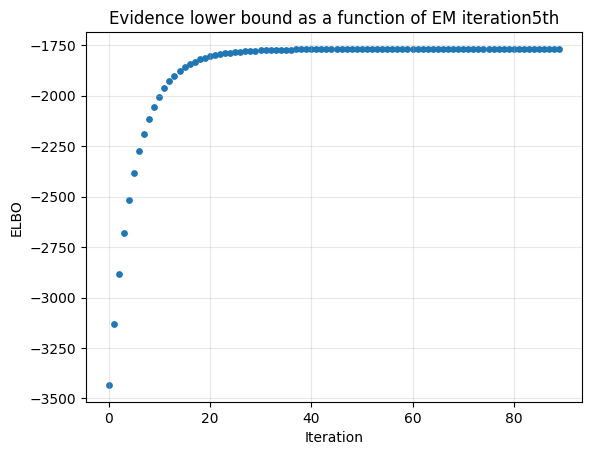

> Reading BED file...
> Generating polygenic scores...
> Reading BED file...
> Reading phenotype file...
> Reading covariates file...
> Performing GWAS...


/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


> Computing LD matrix...
> Initializing model parameters
> Loading LD matrices into memory...
> Performing model fit...
> Using up to 1 threads.


  3%|▎         | 32/1000 [00:00<00:00, 1124.44it/s]

Converged at iteration 33 || ELBO: -3059.413972
> Final ELBO: -3059.413972
> Estimated heritability: 0.376507
> Estimated proportion of causal variants: 0.001000
> Generating polygenic scores...
The  6  th simulation experiment,  the r^2 is  0.09094382551867355



Exception ignored in: <finalize object at 0x7f71401f3730; dead>
Traceback (most recent call last):
  File "/usr/lib/python3.7/weakref.py", line 572, in __call__
    return info.func(*info.args, **(info.kwargs or {}))
  File "/usr/lib/python3.7/tempfile.py", line 934, in _cleanup
    _rmtree(name)
  File "/usr/lib/python3.7/shutil.py", line 485, in rmtree
    onerror(os.lstat, path, sys.exc_info())
  File "/usr/lib/python3.7/shutil.py", line 483, in rmtree
    orig_st = os.lstat(path)
FileNotFoundError: [Errno 2] No such file or directory: 'temp/ld_k6f9nw5_'


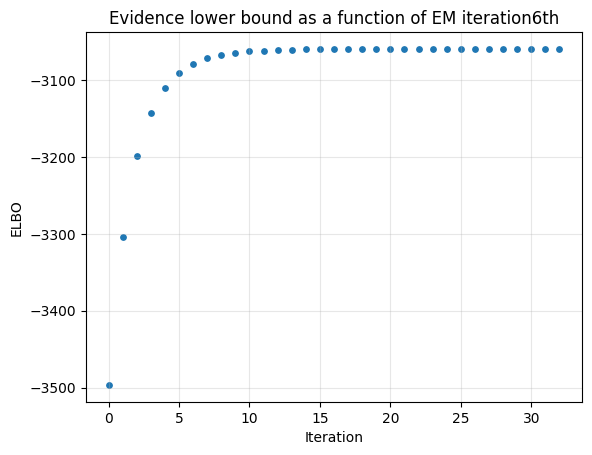

> Reading BED file...
> Generating polygenic scores...
> Reading BED file...
> Reading phenotype file...
> Reading covariates file...
> Performing GWAS...


/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


> Computing LD matrix...
> Initializing model parameters
> Loading LD matrices into memory...
> Performing model fit...
> Using up to 1 threads.


  1%|          | 6/1000 [00:00<00:01, 832.62it/s]

Converged at iteration 7 || ELBO: -3811.208808
> Final ELBO: -3811.208808
> Estimated heritability: 0.027227
> Estimated proportion of causal variants: 0.001000
> Generating polygenic scores...
The  7  th simulation experiment,  the r^2 is  0.011118503836332156



Exception ignored in: <finalize object at 0x7f7128720d60; dead>
Traceback (most recent call last):
  File "/usr/lib/python3.7/weakref.py", line 572, in __call__
    return info.func(*info.args, **(info.kwargs or {}))
  File "/usr/lib/python3.7/tempfile.py", line 934, in _cleanup
    _rmtree(name)
  File "/usr/lib/python3.7/shutil.py", line 485, in rmtree
    onerror(os.lstat, path, sys.exc_info())
  File "/usr/lib/python3.7/shutil.py", line 483, in rmtree
    orig_st = os.lstat(path)
FileNotFoundError: [Errno 2] No such file or directory: 'temp/ld_0vjz8cpg'


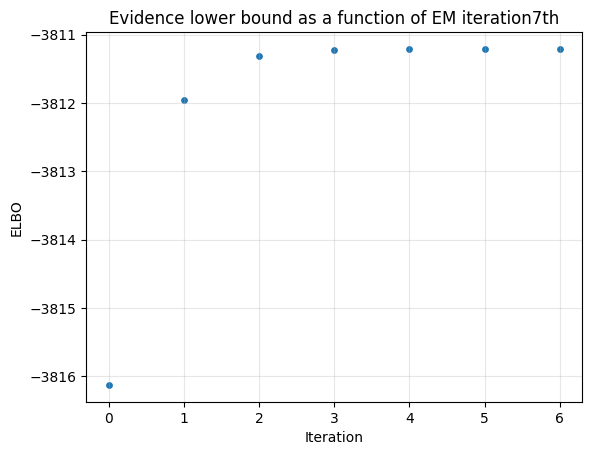

> Reading BED file...
> Generating polygenic scores...
> Reading BED file...
> Reading phenotype file...
> Reading covariates file...
> Performing GWAS...


/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


> Computing LD matrix...
> Initializing model parameters
> Loading LD matrices into memory...
> Performing model fit...
> Using up to 1 threads.


  3%|▎         | 26/1000 [00:00<00:00, 1068.38it/s]

Converged at iteration 27 || ELBO: -3708.956355
> Final ELBO: -3708.956355
> Estimated heritability: 0.094068
> Estimated proportion of causal variants: 0.001000
> Generating polygenic scores...
The  8  th simulation experiment,  the r^2 is  0.007096428964080094



Exception ignored in: <finalize object at 0x7f7128720ae0; dead>
Traceback (most recent call last):
  File "/usr/lib/python3.7/weakref.py", line 572, in __call__
    return info.func(*info.args, **(info.kwargs or {}))
  File "/usr/lib/python3.7/tempfile.py", line 934, in _cleanup
    _rmtree(name)
  File "/usr/lib/python3.7/shutil.py", line 485, in rmtree
    onerror(os.lstat, path, sys.exc_info())
  File "/usr/lib/python3.7/shutil.py", line 483, in rmtree
    orig_st = os.lstat(path)
FileNotFoundError: [Errno 2] No such file or directory: 'temp/ld__21cyraj'


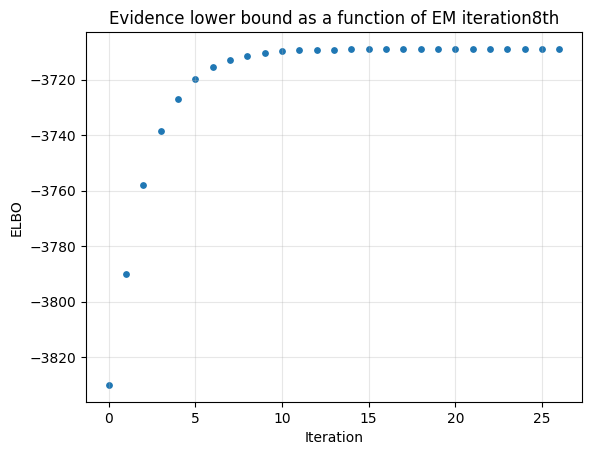

> Reading BED file...
> Generating polygenic scores...
> Reading BED file...
> Reading phenotype file...
> Reading covariates file...
> Performing GWAS...


/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


> Computing LD matrix...
> Initializing model parameters
> Loading LD matrices into memory...
> Performing model fit...
> Using up to 1 threads.


  0%|          | 0/1000 [00:00<?, ?it/s]/home/mcb/users/yzhu439/RA_Project/data/utils/training.py:83: UserWarning: Iteration 5: ELBO dropped from -3565.045696 to -3565.058610.
  v.fit()
/home/mcb/users/yzhu439/RA_Project/data/utils/training.py:83: UserWarning: Iteration 6: ELBO dropped from -3565.058610 to -3565.062760.
  v.fit()
/home/mcb/users/yzhu439/RA_Project/data/utils/training.py:83: UserWarning: Iteration 7: ELBO dropped from -3565.062760 to -3565.063833.
  v.fit()
  1%|          | 7/1000 [00:00<00:01, 936.14it/s]

Converged at iteration 8 || ELBO: -3565.064099
> Final ELBO: -3565.064099
> Estimated heritability: 0.174163
> Estimated proportion of causal variants: 0.001000
> Generating polygenic scores...
The  9  th simulation experiment,  the r^2 is  0.1538074825625791



Exception ignored in: <finalize object at 0x7f71286d7490; dead>
Traceback (most recent call last):
  File "/usr/lib/python3.7/weakref.py", line 572, in __call__
    return info.func(*info.args, **(info.kwargs or {}))
  File "/usr/lib/python3.7/tempfile.py", line 934, in _cleanup
    _rmtree(name)
  File "/usr/lib/python3.7/shutil.py", line 485, in rmtree
    onerror(os.lstat, path, sys.exc_info())
  File "/usr/lib/python3.7/shutil.py", line 483, in rmtree
    orig_st = os.lstat(path)
FileNotFoundError: [Errno 2] No such file or directory: 'temp/ld_apz2ubr1'


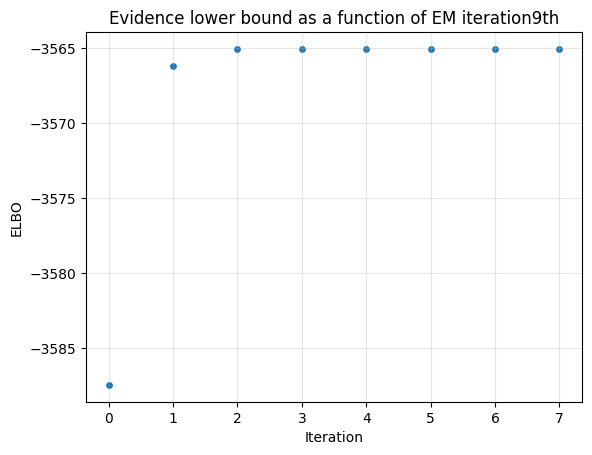

> Reading BED file...
> Generating polygenic scores...
> Reading BED file...
> Reading phenotype file...
> Reading covariates file...
> Performing GWAS...


/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


> Computing LD matrix...
> Initializing model parameters
> Loading LD matrices into memory...
> Performing model fit...
> Using up to 1 threads.


  7%|▋         | 74/1000 [00:00<00:00, 1242.09it/s]

Converged at iteration 75 | ELBO: -2840.529336
> Final ELBO: -2840.529336
> Estimated heritability: 0.420428
> Estimated proportion of causal variants: 0.001000
> Generating polygenic scores...
The  10  th simulation experiment,  the r^2 is  0.06778583017570645



Exception ignored in: <finalize object at 0x7f712826e240; dead>
Traceback (most recent call last):
  File "/usr/lib/python3.7/weakref.py", line 572, in __call__
    return info.func(*info.args, **(info.kwargs or {}))
  File "/usr/lib/python3.7/tempfile.py", line 934, in _cleanup
    _rmtree(name)
  File "/usr/lib/python3.7/shutil.py", line 485, in rmtree
    onerror(os.lstat, path, sys.exc_info())
  File "/usr/lib/python3.7/shutil.py", line 483, in rmtree
    orig_st = os.lstat(path)
FileNotFoundError: [Errno 2] No such file or directory: 'temp/ld_y26ff5fd'


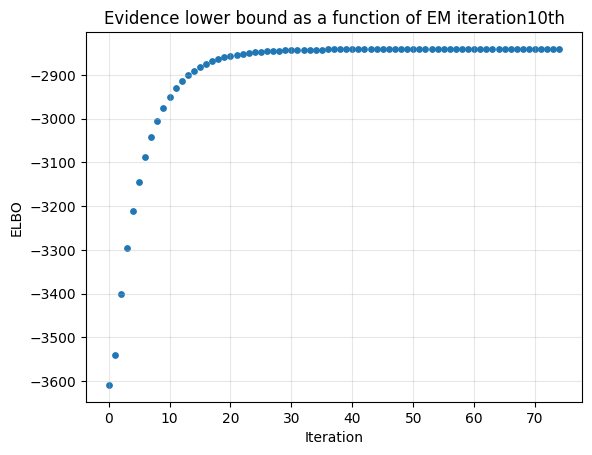

In [62]:

shuffle100_addCov_r2s = []
for i in range(1,11):
    R2, ELBO_list = train_chr22_100SNPs_addCov()
    print("The ", i, " th simulation experiment, ", "the r^2 is ", R2)
    elbo_path = "ELBO_history_fig/shuffled100_addCov_itr" + str(i) + ".png"
    ELBO_plot(ELBO_list, elbo_path, i)
    shuffle100_addCov_r2s.append(R2)
    

In [63]:
shuffle100_addCov_r2s


[0.11275010366766634,
 0.08483403170470893,
 0.024307029194768986,
 0.019005276846843416,
 0.07062232253999136,
 0.09094382551867355,
 0.011118503836332156,
 0.007096428964080094,
 0.1538074825625791,
 0.06778583017570645]

In [64]:
print("the training times:", len(shuffle100_addCov_r2s))
sum(shuffle100_addCov_r2s)/len(shuffle100_addCov_r2s)

the training times: 10


0.06422708350113504

<h3> July 14th, set effect size (beta) of each SNP </h3> 
Try for 100SNPs chr22 2706 patients with pi = [0.99, 0.01], h2 = 0.5. In this case, there is only one causal SNP.  
<code>Set one causal SNP effect size = 0.5, other SNPs = 0</code>, theoratically, r^2 would be exactly same as h2.  

The effect size funcitono is in GWASimulator, <code>set_beta(new_data)</code>:  
params: new_data: A dictionary where the keys are the chr. and the values are the beta for each SNP on that chromosome. 


In [65]:
beta100np = np.zeros(100)
beta100np[20] = 0.5     # rs11090428

beta100 = {22: beta100np}

g_sim = mgp.GWASimulator("CMAll_qced/chr22/shuffle_100snps",
                        pi = [.99, .01],
                        h2=0.5)

> Reading BED file...


In [66]:
g_sim.set_beta(beta100)
g_sim.simulate(reset_beta=False)
g_sim.to_phenotype_table().to_csv("Toy_example_expr/phenotype/shuffle100_phe.csv",sep='\t')

> Generating polygenic scores...


/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/magenpy/simulation/GWASimulator.py:91: RuntimeWarning: divide by zero encountered in double_scalars
  sigma_beta_sq = self.h2 / (combined_assignments*self.d).sum()
/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/magenpy/simulation/GWASimulator.py:96: RuntimeWarning: invalid value encountered in multiply
  self.per_snp_h2[c] = sigma_beta_sq*self.d[np.where(self.mixture_assignment[c])[1]]


In [67]:
# calculate gwas
g_sim.perform_gwas()
g_sim.to_summary_statistics_table().to_csv(
    "Toy_example_expr/shuffle_100snps.sumstats", sep="\t", index=False
)
# Load summary statistics（simulate phenotype from above) and match them with perviously
gdl_sim = mgp.GWADataLoader(bed_files="CMAll_qced/chr22/shuffle_100snps",
                            sumstats_files="Toy_example_expr/shuffle_100snps.sumstats",
                            sumstats_format="magenpy")
# calculate LD
gdl_sim.compute_ld(estimator='sample',
                    output_dir='Toy_example_expr/shuffle100_chr22_out/')


> Performing GWAS...
> Reading BED file...
> Reading summary statistics file...
> Harmonizing data...
> Computing LD matrix...


/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


In [68]:
# viprs
v = vp.VIPRS(gdl_sim, fix_params={'pi': 0.001, 'sigma_epsilon': 0.999}) 
v.fit()

# predict on the same dataset directly 
# g_sim.to_phenotype_table().to_csv("Toy_example_expr/phenotype/shuffle100_phe.txt",sep='\t', index=False)
val_prs = v.predict()
r2(val_prs, g_sim.sample_table.phenotype)  #v.history['ELBO']

Exception ignored in: <finalize object at 0x7fe6590f1c80; dead>
Traceback (most recent call last):
  File "/usr/lib/python3.7/weakref.py", line 572, in __call__
    return info.func(*info.args, **(info.kwargs or {}))
  File "/usr/lib/python3.7/tempfile.py", line 934, in _cleanup
    _rmtree(name)
  File "/usr/lib/python3.7/shutil.py", line 485, in rmtree
    onerror(os.lstat, path, sys.exc_info())
  File "/usr/lib/python3.7/shutil.py", line 483, in rmtree
    orig_st = os.lstat(path)
FileNotFoundError: [Errno 2] No such file or directory: 'temp/ld_gk90x8i8'


> Initializing model parameters
> Loading LD matrices into memory...
> Performing model fit...
> Using up to 1 threads.


  0%|          | 5/1000 [00:00<00:01, 794.35it/s]

Converged at iteration 6 || ELBO: -3692.196847
> Final ELBO: -3692.196847
> Estimated heritability: 0.104279
> Estimated proportion of causal variants: 0.001000
> Generating polygenic scores...


0.0780364058402266

In [70]:
val_prs

array([-2.21815432e-04, -1.33561751e-04,  3.75892443e-04, ...,
        1.76367566e-04, -9.79311386e-05, -1.45179653e-04])

In [71]:
g_sim.sample_table.phenotype

array([-0.31073083,  0.63625898,  0.01912754, ...,  0.42490486,
        0.52849371,  0.60514359])

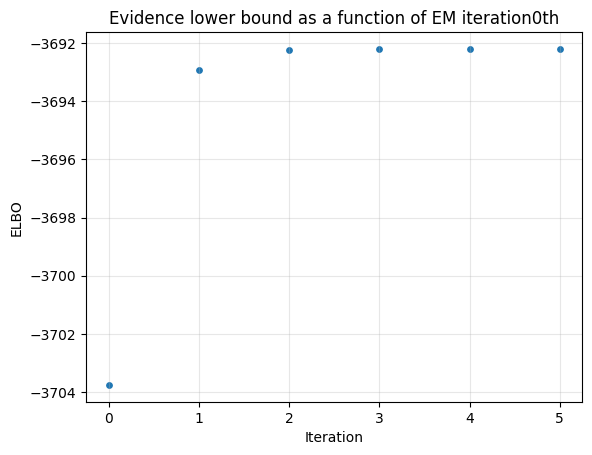

In [72]:
ELBO_plot(v.history['ELBO'], "ELBO_history_fig/set_beta100.png",itr=0)

Run 10 times of the upper codes,  
the funciton used "fixed_beta_100SNPs()" in "data/utils/training.py"

> Reading BED file...
> Generating polygenic scores...
> Performing GWAS...
> Reading BED file...


/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


> Reading summary statistics file...
> Harmonizing data...
> Computing LD matrix...
> Initializing model parameters
> Loading LD matrices into memory...
> Performing model fit...
> Using up to 1 threads.


  0%|          | 5/1000 [00:00<00:01, 869.36it/s]

Converged at iteration 6 || ELBO: -3711.921846
> Final ELBO: -3711.921846
> Estimated heritability: 0.092437
> Estimated proportion of causal variants: 0.001000
> Generating polygenic scores...



Exception ignored in: <finalize object at 0x7fbcc44f2d00; dead>
Traceback (most recent call last):
  File "/usr/lib/python3.7/weakref.py", line 572, in __call__
    return info.func(*info.args, **(info.kwargs or {}))
  File "/usr/lib/python3.7/tempfile.py", line 934, in _cleanup
    _rmtree(name)
  File "/usr/lib/python3.7/shutil.py", line 485, in rmtree
    onerror(os.lstat, path, sys.exc_info())
  File "/usr/lib/python3.7/shutil.py", line 483, in rmtree
    orig_st = os.lstat(path)
FileNotFoundError: [Errno 2] No such file or directory: 'temp/ld_vb4y5q0u'


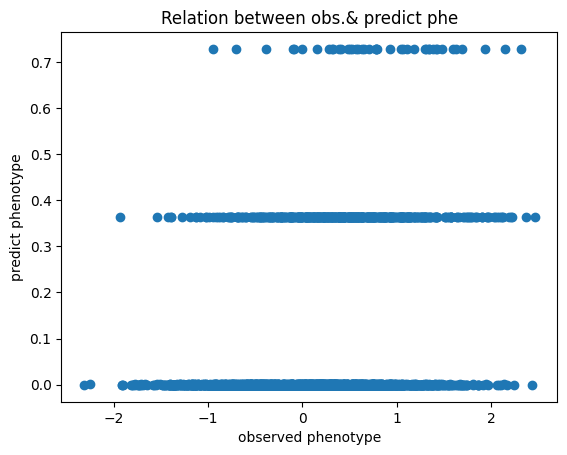

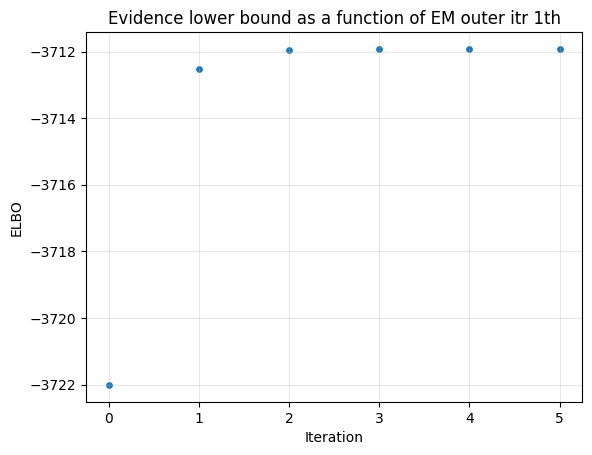

> Reading BED file...
> Generating polygenic scores...
> Performing GWAS...
> Reading BED file...
> Reading summary statistics file...
> Harmonizing data...


/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


> Computing LD matrix...
> Initializing model parameters
> Loading LD matrices into memory...
> Performing model fit...
> Using up to 1 threads.


  0%|          | 5/1000 [00:00<00:01, 946.45it/s]

Converged at iteration 6 || ELBO: -3637.799324
> Final ELBO: -3637.799324
> Estimated heritability: 0.135514
> Estimated proportion of causal variants: 0.001000
> Generating polygenic scores...



Exception ignored in: <finalize object at 0x7fbca43b06b0; dead>
Traceback (most recent call last):
  File "/usr/lib/python3.7/weakref.py", line 572, in __call__
    return info.func(*info.args, **(info.kwargs or {}))
  File "/usr/lib/python3.7/tempfile.py", line 934, in _cleanup
    _rmtree(name)
  File "/usr/lib/python3.7/shutil.py", line 485, in rmtree
    onerror(os.lstat, path, sys.exc_info())
  File "/usr/lib/python3.7/shutil.py", line 483, in rmtree
    orig_st = os.lstat(path)
FileNotFoundError: [Errno 2] No such file or directory: 'temp/ld_66gv0uop'


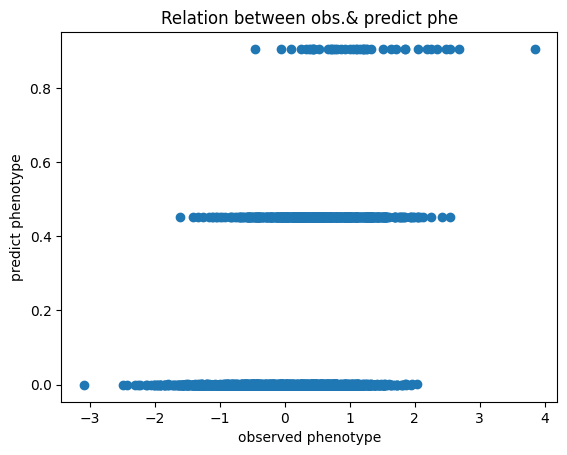

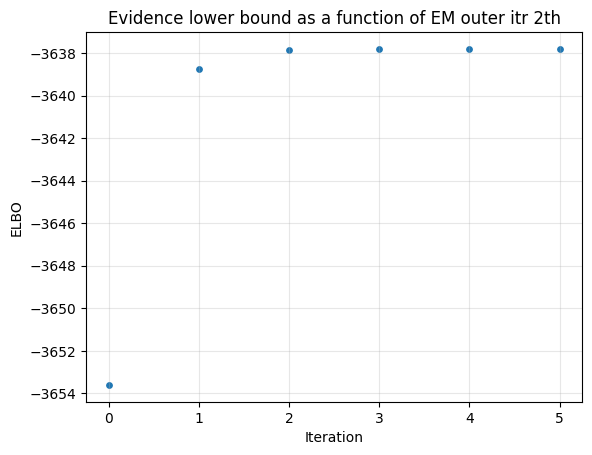

> Reading BED file...
> Generating polygenic scores...
> Performing GWAS...
> Reading BED file...


/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


> Reading summary statistics file...
> Harmonizing data...
> Computing LD matrix...
> Initializing model parameters
> Loading LD matrices into memory...
> Performing model fit...
> Using up to 1 threads.


  0%|          | 5/1000 [00:00<00:01, 871.13it/s]

Converged at iteration 6 || ELBO: -3673.289880
> Final ELBO: -3673.289880
> Estimated heritability: 0.115422
> Estimated proportion of causal variants: 0.001000
> Generating polygenic scores...



Exception ignored in: <finalize object at 0x7fbca43b05b0; dead>
Traceback (most recent call last):
  File "/usr/lib/python3.7/weakref.py", line 572, in __call__
    return info.func(*info.args, **(info.kwargs or {}))
  File "/usr/lib/python3.7/tempfile.py", line 934, in _cleanup
    _rmtree(name)
  File "/usr/lib/python3.7/shutil.py", line 485, in rmtree
    onerror(os.lstat, path, sys.exc_info())
  File "/usr/lib/python3.7/shutil.py", line 483, in rmtree
    orig_st = os.lstat(path)
FileNotFoundError: [Errno 2] No such file or directory: 'temp/ld_josp8_8l'


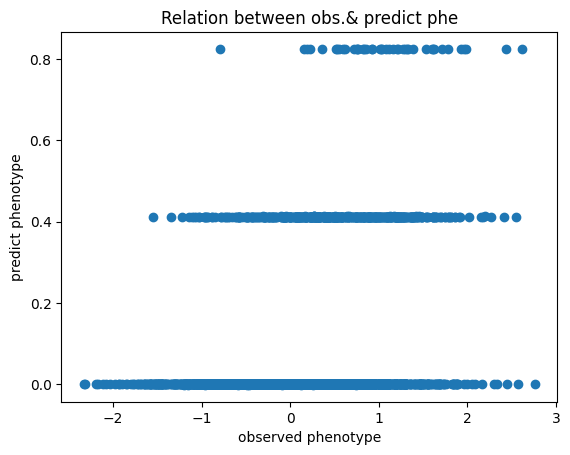

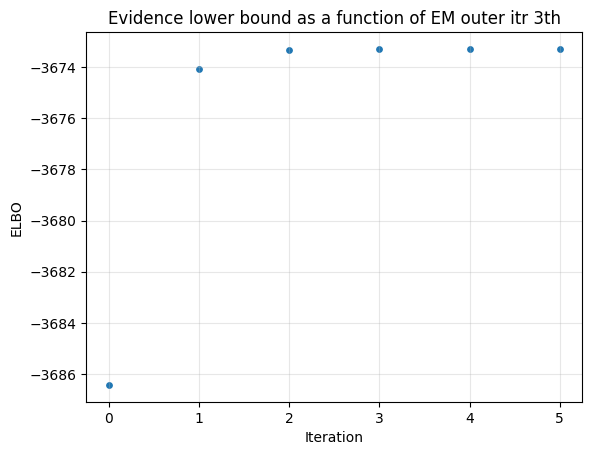

> Reading BED file...
> Generating polygenic scores...
> Performing GWAS...


/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


> Reading BED file...
> Reading summary statistics file...
> Harmonizing data...
> Computing LD matrix...
> Initializing model parameters
> Loading LD matrices into memory...
> Performing model fit...
> Using up to 1 threads.


  0%|          | 4/1000 [00:00<00:01, 845.67it/s]

Converged at iteration 5 || ELBO: -3680.918126
> Final ELBO: -3680.918126
> Estimated heritability: 0.110842
> Estimated proportion of causal variants: 0.001000
> Generating polygenic scores...



Exception ignored in: <finalize object at 0x7fbca41e38a0; dead>
Traceback (most recent call last):
  File "/usr/lib/python3.7/weakref.py", line 572, in __call__
    return info.func(*info.args, **(info.kwargs or {}))
  File "/usr/lib/python3.7/tempfile.py", line 934, in _cleanup
    _rmtree(name)
  File "/usr/lib/python3.7/shutil.py", line 485, in rmtree
    onerror(os.lstat, path, sys.exc_info())
  File "/usr/lib/python3.7/shutil.py", line 483, in rmtree
    orig_st = os.lstat(path)
FileNotFoundError: [Errno 2] No such file or directory: 'temp/ld_6qwmxtwb'


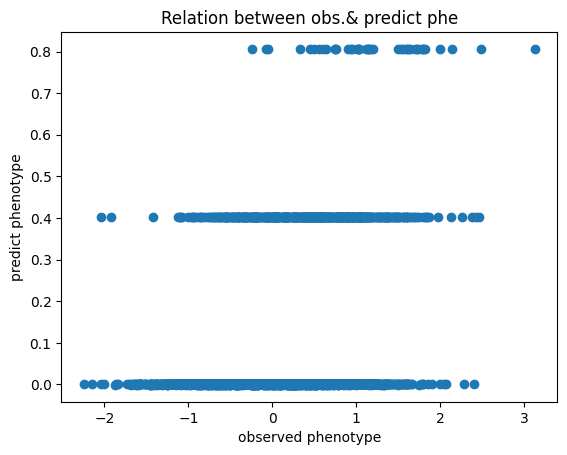

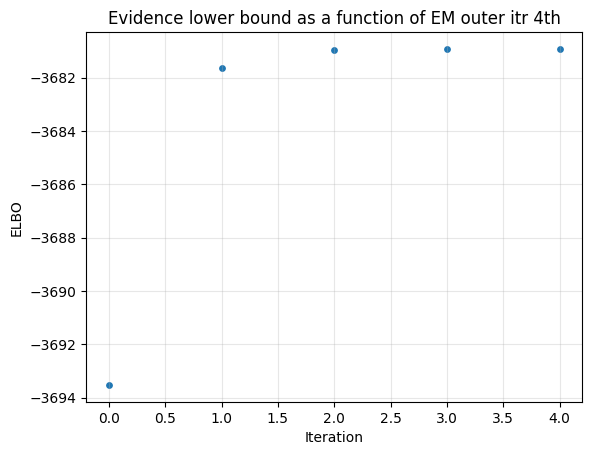

> Reading BED file...
> Generating polygenic scores...
> Performing GWAS...
> Reading BED file...
> Reading summary statistics file...
> Harmonizing data...


/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


> Computing LD matrix...
> Initializing model parameters
> Loading LD matrices into memory...
> Performing model fit...
> Using up to 1 threads.


  0%|          | 5/1000 [00:00<00:01, 943.22it/s]

Converged at iteration 6 || ELBO: -3670.129928
> Final ELBO: -3670.129928
> Estimated heritability: 0.117221
> Estimated proportion of causal variants: 0.001000
> Generating polygenic scores...



Exception ignored in: <finalize object at 0x7fbc907b3720; dead>
Traceback (most recent call last):
  File "/usr/lib/python3.7/weakref.py", line 572, in __call__
    return info.func(*info.args, **(info.kwargs or {}))
  File "/usr/lib/python3.7/tempfile.py", line 934, in _cleanup
    _rmtree(name)
  File "/usr/lib/python3.7/shutil.py", line 485, in rmtree
    onerror(os.lstat, path, sys.exc_info())
  File "/usr/lib/python3.7/shutil.py", line 483, in rmtree
    orig_st = os.lstat(path)
FileNotFoundError: [Errno 2] No such file or directory: 'temp/ld_8211dhl_'


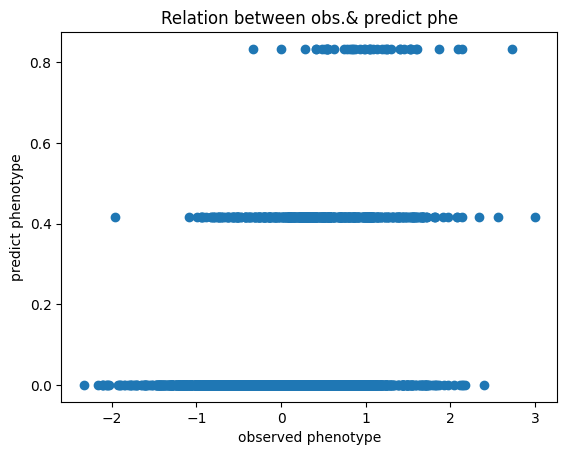

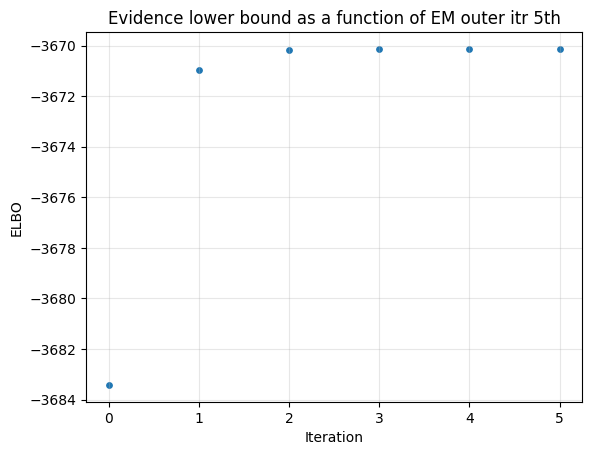

> Reading BED file...
> Generating polygenic scores...
> Performing GWAS...


/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/magenpy/simulation/GWASimulator.py:91: RuntimeWarning: divide by zero encountered in double_scalars
  sigma_beta_sq = self.h2 / (combined_assignments*self.d).sum()
/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/magenpy/simulation/GWASimulator.py:96: RuntimeWarning: invalid value encountered in multiply
  self.per_snp_h2[c] = sigma_beta_sq*self.d[np.where(self.mixture_assignment[c])[1]]
/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


> Reading BED file...
> Reading summary statistics file...
> Harmonizing data...
> Computing LD matrix...
> Initializing model parameters
> Loading LD matrices into memory...
> Performing model fit...
> Using up to 1 threads.


  0%|          | 5/1000 [00:00<00:01, 935.52it/s]

Converged at iteration 6 || ELBO: -3688.810696
> Final ELBO: -3688.810696
> Estimated heritability: 0.106328
> Estimated proportion of causal variants: 0.001000
> Generating polygenic scores...



Exception ignored in: <finalize object at 0x7fbca41e3770; dead>
Traceback (most recent call last):
  File "/usr/lib/python3.7/weakref.py", line 572, in __call__
    return info.func(*info.args, **(info.kwargs or {}))
  File "/usr/lib/python3.7/tempfile.py", line 934, in _cleanup
    _rmtree(name)
  File "/usr/lib/python3.7/shutil.py", line 485, in rmtree
    onerror(os.lstat, path, sys.exc_info())
  File "/usr/lib/python3.7/shutil.py", line 483, in rmtree
    orig_st = os.lstat(path)
FileNotFoundError: [Errno 2] No such file or directory: 'temp/ld_c0yut45u'


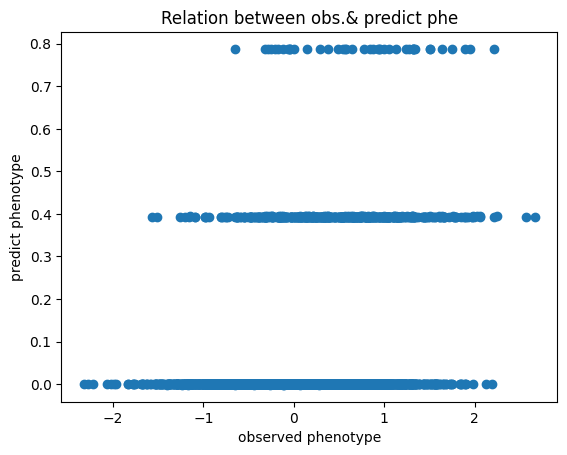

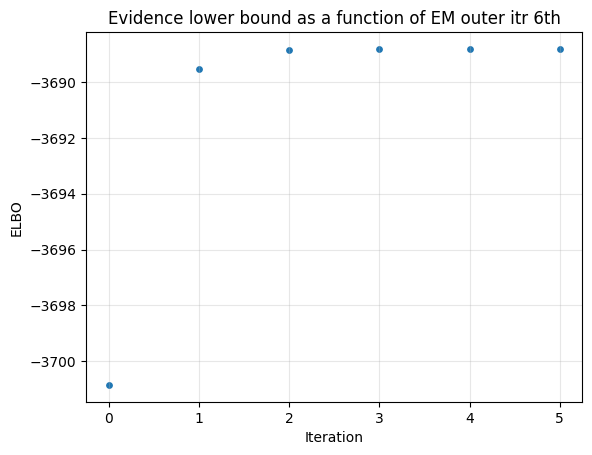

> Reading BED file...
> Generating polygenic scores...
> Performing GWAS...


/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/magenpy/simulation/GWASimulator.py:91: RuntimeWarning: divide by zero encountered in double_scalars
  sigma_beta_sq = self.h2 / (combined_assignments*self.d).sum()
/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/magenpy/simulation/GWASimulator.py:96: RuntimeWarning: invalid value encountered in multiply
  self.per_snp_h2[c] = sigma_beta_sq*self.d[np.where(self.mixture_assignment[c])[1]]
/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


> Reading BED file...
> Reading summary statistics file...
> Harmonizing data...
> Computing LD matrix...


/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


> Initializing model parameters
> Loading LD matrices into memory...
> Performing model fit...
> Using up to 1 threads.


  0%|          | 5/1000 [00:00<00:01, 818.69it/s]

Converged at iteration 6 || ELBO: -3690.817306
> Final ELBO: -3690.817306
> Estimated heritability: 0.105115
> Estimated proportion of causal variants: 0.001000
> Generating polygenic scores...



Exception ignored in: <finalize object at 0x7fbc907b3760; dead>
Traceback (most recent call last):
  File "/usr/lib/python3.7/weakref.py", line 572, in __call__
    return info.func(*info.args, **(info.kwargs or {}))
  File "/usr/lib/python3.7/tempfile.py", line 934, in _cleanup
    _rmtree(name)
  File "/usr/lib/python3.7/shutil.py", line 485, in rmtree
    onerror(os.lstat, path, sys.exc_info())
  File "/usr/lib/python3.7/shutil.py", line 483, in rmtree
    orig_st = os.lstat(path)
FileNotFoundError: [Errno 2] No such file or directory: 'temp/ld_jlmq4wvi'


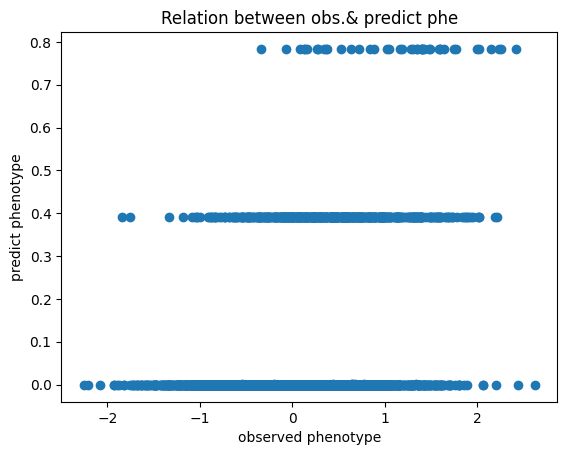

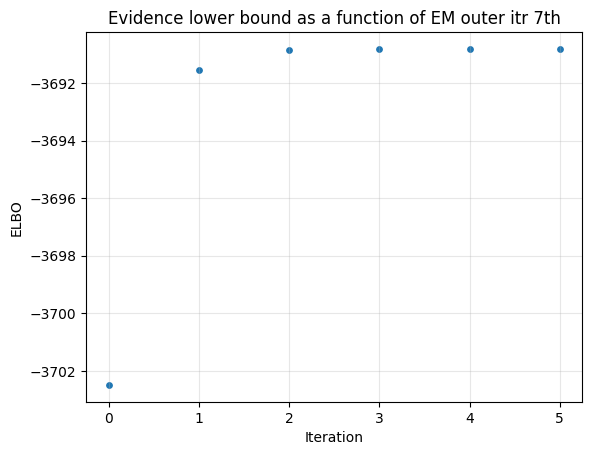

> Reading BED file...
> Generating polygenic scores...
> Performing GWAS...


/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/magenpy/simulation/GWASimulator.py:91: RuntimeWarning: divide by zero encountered in double_scalars
  sigma_beta_sq = self.h2 / (combined_assignments*self.d).sum()
/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/magenpy/simulation/GWASimulator.py:96: RuntimeWarning: invalid value encountered in multiply
  self.per_snp_h2[c] = sigma_beta_sq*self.d[np.where(self.mixture_assignment[c])[1]]
/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


> Reading BED file...
> Reading summary statistics file...
> Harmonizing data...
> Computing LD matrix...


/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


> Initializing model parameters
> Loading LD matrices into memory...
> Performing model fit...
> Using up to 1 threads.


  0%|          | 5/1000 [00:00<00:01, 948.21it/s]

Converged at iteration 6 || ELBO: -3631.230195
> Final ELBO: -3631.230195
> Estimated heritability: 0.139121
> Estimated proportion of causal variants: 0.001000
> Generating polygenic scores...



Exception ignored in: <finalize object at 0x7fbc907b3850; dead>
Traceback (most recent call last):
  File "/usr/lib/python3.7/weakref.py", line 572, in __call__
    return info.func(*info.args, **(info.kwargs or {}))
  File "/usr/lib/python3.7/tempfile.py", line 934, in _cleanup
    _rmtree(name)
  File "/usr/lib/python3.7/shutil.py", line 485, in rmtree
    onerror(os.lstat, path, sys.exc_info())
  File "/usr/lib/python3.7/shutil.py", line 483, in rmtree
    orig_st = os.lstat(path)
FileNotFoundError: [Errno 2] No such file or directory: 'temp/ld_zd0eeame'


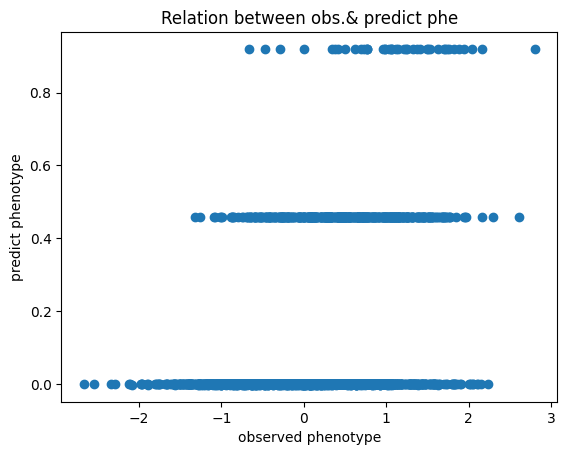

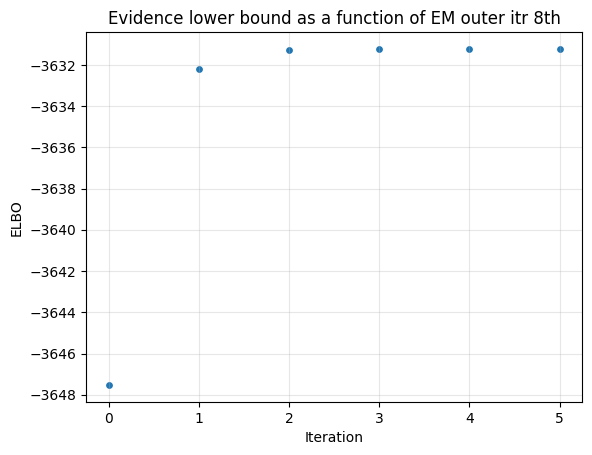

> Reading BED file...
> Generating polygenic scores...
> Performing GWAS...


/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/magenpy/simulation/GWASimulator.py:91: RuntimeWarning: divide by zero encountered in double_scalars
  sigma_beta_sq = self.h2 / (combined_assignments*self.d).sum()
/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/magenpy/simulation/GWASimulator.py:96: RuntimeWarning: invalid value encountered in multiply
  self.per_snp_h2[c] = sigma_beta_sq*self.d[np.where(self.mixture_assignment[c])[1]]
/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


> Reading BED file...
> Reading summary statistics file...
> Harmonizing data...
> Computing LD matrix...


/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


> Initializing model parameters
> Loading LD matrices into memory...
> Performing model fit...
> Using up to 1 threads.


  0%|          | 5/1000 [00:00<00:01, 890.89it/s]

Converged at iteration 6 || ELBO: -3704.947346
> Final ELBO: -3704.947346
> Estimated heritability: 0.096680
> Estimated proportion of causal variants: 0.001000
> Generating polygenic scores...



Exception ignored in: <finalize object at 0x7fbca418b8d0; dead>
Traceback (most recent call last):
  File "/usr/lib/python3.7/weakref.py", line 572, in __call__
    return info.func(*info.args, **(info.kwargs or {}))
  File "/usr/lib/python3.7/tempfile.py", line 934, in _cleanup
    _rmtree(name)
  File "/usr/lib/python3.7/shutil.py", line 485, in rmtree
    onerror(os.lstat, path, sys.exc_info())
  File "/usr/lib/python3.7/shutil.py", line 483, in rmtree
    orig_st = os.lstat(path)
FileNotFoundError: [Errno 2] No such file or directory: 'temp/ld_0uc3wcvq'


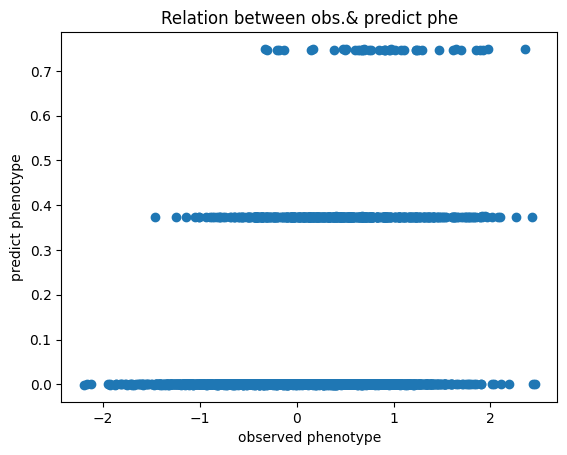

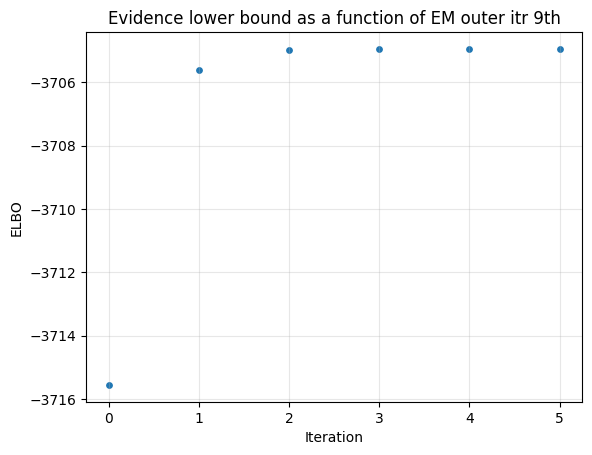

> Reading BED file...
> Generating polygenic scores...
> Performing GWAS...
> Reading BED file...
> Reading summary statistics file...
> Harmonizing data...


/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/magenpy/simulation/GWASimulator.py:91: RuntimeWarning: divide by zero encountered in double_scalars
  sigma_beta_sq = self.h2 / (combined_assignments*self.d).sum()
/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/magenpy/simulation/GWASimulator.py:96: RuntimeWarning: invalid value encountered in multiply
  self.per_snp_h2[c] = sigma_beta_sq*self.d[np.where(self.mixture_assignment[c])[1]]
/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


> Computing LD matrix...


/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


> Initializing model parameters
> Loading LD matrices into memory...
> Performing model fit...
> Using up to 1 threads.


  1%|          | 10/1000 [00:00<00:00, 1151.08it/s]

Converged at iteration 11 || ELBO: -3640.890298
> Final ELBO: -3640.890298
> Estimated heritability: 0.133960
> Estimated proportion of causal variants: 0.001000
> Generating polygenic scores...



Exception ignored in: <finalize object at 0x7fbca425a350; dead>
Traceback (most recent call last):
  File "/usr/lib/python3.7/weakref.py", line 572, in __call__
    return info.func(*info.args, **(info.kwargs or {}))
  File "/usr/lib/python3.7/tempfile.py", line 934, in _cleanup
    _rmtree(name)
  File "/usr/lib/python3.7/shutil.py", line 485, in rmtree
    onerror(os.lstat, path, sys.exc_info())
  File "/usr/lib/python3.7/shutil.py", line 483, in rmtree
    orig_st = os.lstat(path)
FileNotFoundError: [Errno 2] No such file or directory: 'temp/ld_98214d6c'


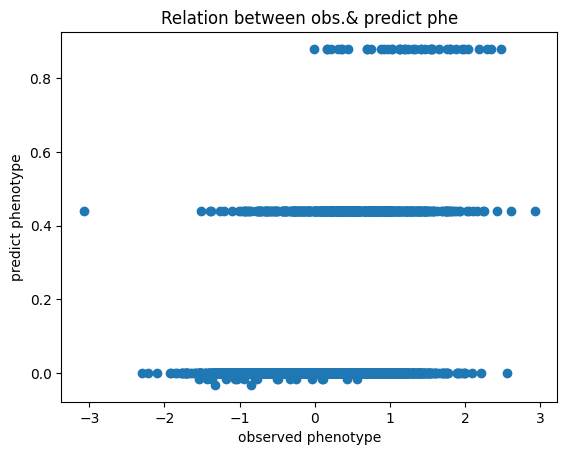

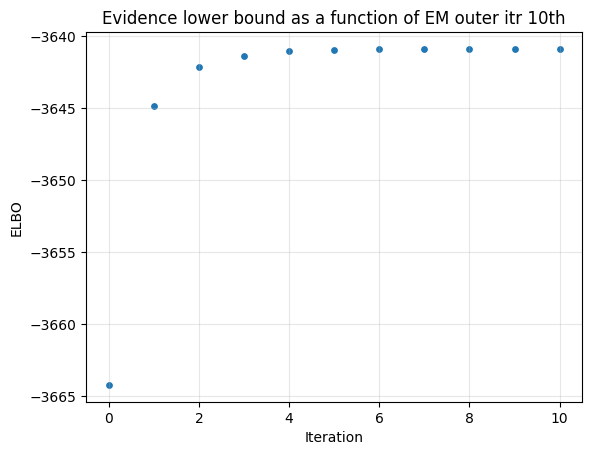

In [2]:
list_r2 = []
for i in range(1, 11):
    r_squ, elbo_list,pre, phe = fixed_beta_100SNPs()
    list_r2.append(r_squ)
    plot_obs_vs_pred(phe, pre)
    pict_name = "ELBO_history_fig/set_beta100_itr"+ str(i) + ".png"
    ELBO_plot(elbo_list, "ELBO_history_fig/set_beta100.png",itr=i)

In [3]:
pre

array([-0.00061839, -0.00082804, -0.00086098, ..., -0.00070421,
       -0.00046029, -0.00064462])

In [3]:
list_r2

[0.07312189699219662,
 0.10612044676516988,
 0.09008918471743349,
 0.09085846725506484,
 0.09036499476680135,
 0.08285874596971979,
 0.08150704514053309,
 0.11070749462941047,
 0.07641605795165261,
 0.10504037862761327]

In [4]:
sum(list_r2)/10

0.09070847128155954

<h5> Try to run experiments of the shuffled 500 SNPs </h5>


> Reading BED file...
> Generating polygenic scores...
> Performing GWAS...


/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


> Reading BED file...
> Reading summary statistics file...
> Harmonizing data...
> Computing LD matrix...


/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


> Initializing model parameters
> Loading LD matrices into memory...
> Performing model fit...
> Using up to 1 threads.


 29%|██▉       | 293/1000 [00:00<00:01, 356.25it/s]
Exception ignored in: <finalize object at 0x7fe50c4f3940; dead>
Traceback (most recent call last):
  File "/usr/lib/python3.7/weakref.py", line 572, in __call__
    return info.func(*info.args, **(info.kwargs or {}))
  File "/usr/lib/python3.7/tempfile.py", line 934, in _cleanup
    _rmtree(name)
  File "/usr/lib/python3.7/shutil.py", line 485, in rmtree
    onerror(os.lstat, path, sys.exc_info())
  File "/usr/lib/python3.7/shutil.py", line 483, in rmtree
    orig_st = os.lstat(path)
FileNotFoundError: [Errno 2] No such file or directory: 'temp/ld_ektkqcd8'


Converged at iteration 294 | ELBO: 7692.530024
> Final ELBO: 7692.530024
> Estimated heritability: 0.771630
> Estimated proportion of causal variants: 0.001000
> Generating polygenic scores...


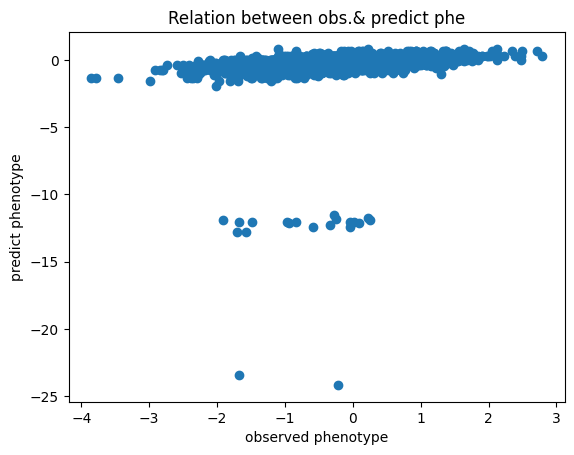

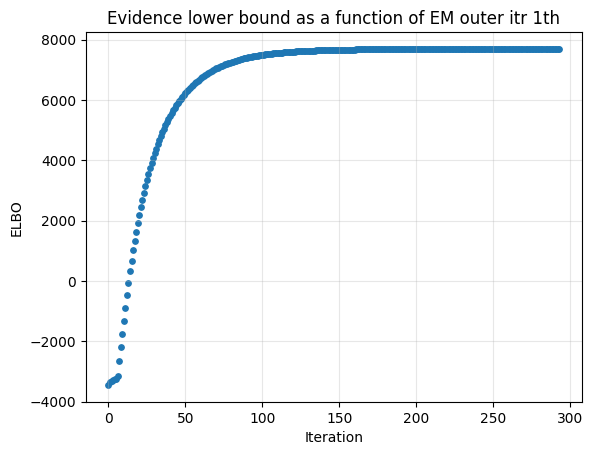

> Reading BED file...
> Generating polygenic scores...
> Performing GWAS...


/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


> Reading BED file...
> Reading summary statistics file...
> Harmonizing data...
> Computing LD matrix...
> Initializing model parameters
> Loading LD matrices into memory...
> Performing model fit...
> Using up to 1 threads.


  2%|▏         | 15/1000 [00:00<00:02, 356.67it/s]

Converged at iteration 16 || ELBO: -3321.282168
> Final ELBO: -3321.282168
> Estimated heritability: 0.292254
> Estimated proportion of causal variants: 0.001000
> Generating polygenic scores...



Exception ignored in: <finalize object at 0x7fe50c3462b0; dead>
Traceback (most recent call last):
  File "/usr/lib/python3.7/weakref.py", line 572, in __call__
    return info.func(*info.args, **(info.kwargs or {}))
  File "/usr/lib/python3.7/tempfile.py", line 934, in _cleanup
    _rmtree(name)
  File "/usr/lib/python3.7/shutil.py", line 485, in rmtree
    onerror(os.lstat, path, sys.exc_info())
  File "/usr/lib/python3.7/shutil.py", line 483, in rmtree
    orig_st = os.lstat(path)
FileNotFoundError: [Errno 2] No such file or directory: 'temp/ld_o56gharl'


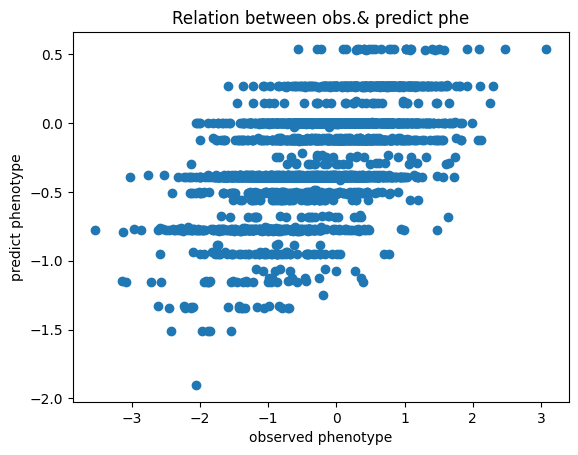

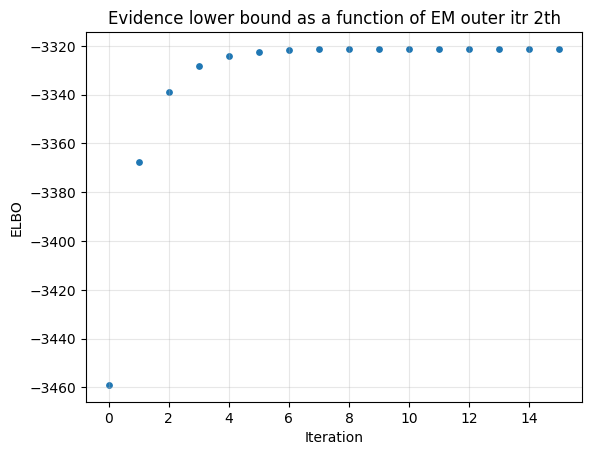

> Reading BED file...
> Generating polygenic scores...
> Performing GWAS...


/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


> Reading BED file...
> Reading summary statistics file...
> Harmonizing data...
> Computing LD matrix...
> Initializing model parameters
> Loading LD matrices into memory...
> Performing model fit...
> Using up to 1 threads.


  2%|▏         | 15/1000 [00:00<00:02, 358.86it/s]

Converged at iteration 16 || ELBO: -3246.086812
> Final ELBO: -3246.086812
> Estimated heritability: 0.318963
> Estimated proportion of causal variants: 0.001000
> Generating polygenic scores...



Exception ignored in: <finalize object at 0x7fe50c4f38e0; dead>
Traceback (most recent call last):
  File "/usr/lib/python3.7/weakref.py", line 572, in __call__
    return info.func(*info.args, **(info.kwargs or {}))
  File "/usr/lib/python3.7/tempfile.py", line 934, in _cleanup
    _rmtree(name)
  File "/usr/lib/python3.7/shutil.py", line 485, in rmtree
    onerror(os.lstat, path, sys.exc_info())
  File "/usr/lib/python3.7/shutil.py", line 483, in rmtree
    orig_st = os.lstat(path)
FileNotFoundError: [Errno 2] No such file or directory: 'temp/ld_8x171l1i'


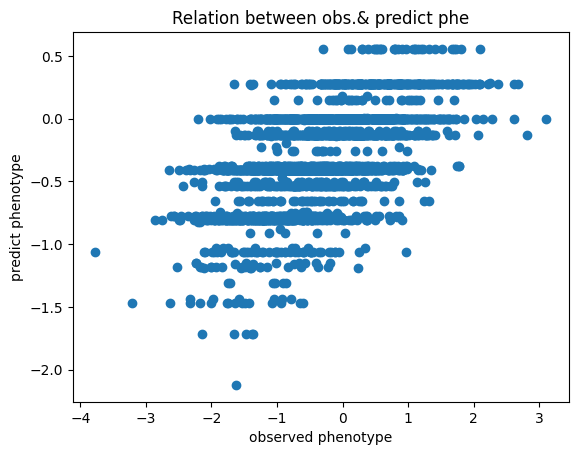

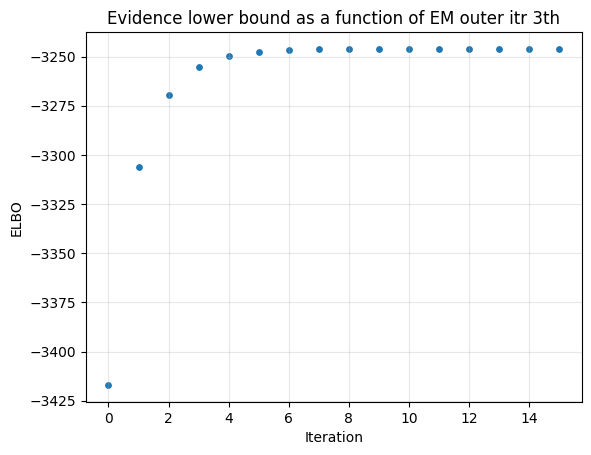

> Reading BED file...
> Generating polygenic scores...
> Performing GWAS...


/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


> Reading BED file...
> Reading summary statistics file...
> Harmonizing data...
> Computing LD matrix...


/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


> Initializing model parameters
> Loading LD matrices into memory...
> Performing model fit...
> Using up to 1 threads.


  2%|▏         | 15/1000 [00:00<00:02, 353.21it/s]

Converged at iteration 16 || ELBO: -3217.653278
> Final ELBO: -3217.653278
> Estimated heritability: 0.328595
> Estimated proportion of causal variants: 0.001000
> Generating polygenic scores...



Exception ignored in: <finalize object at 0x7fe514385090; dead>
Traceback (most recent call last):
  File "/usr/lib/python3.7/weakref.py", line 572, in __call__
    return info.func(*info.args, **(info.kwargs or {}))
  File "/usr/lib/python3.7/tempfile.py", line 934, in _cleanup
    _rmtree(name)
  File "/usr/lib/python3.7/shutil.py", line 485, in rmtree
    onerror(os.lstat, path, sys.exc_info())
  File "/usr/lib/python3.7/shutil.py", line 483, in rmtree
    orig_st = os.lstat(path)
FileNotFoundError: [Errno 2] No such file or directory: 'temp/ld_xjyuog7u'


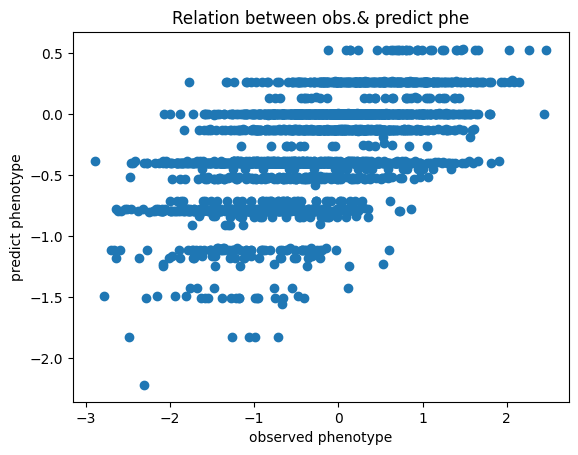

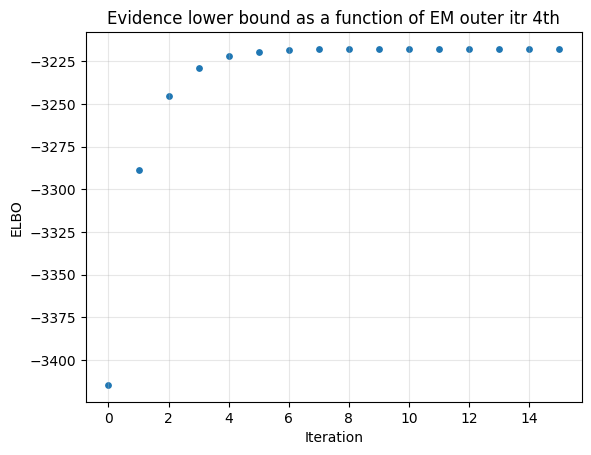

> Reading BED file...
> Generating polygenic scores...
> Performing GWAS...


/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


> Reading BED file...
> Reading summary statistics file...
> Harmonizing data...
> Computing LD matrix...


/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


> Initializing model parameters
> Loading LD matrices into memory...
> Performing model fit...
> Using up to 1 threads.


 34%|███▎      | 335/1000 [00:00<00:01, 372.99it/s]
Exception ignored in: <finalize object at 0x7fe50c346c00; dead>
Traceback (most recent call last):
  File "/usr/lib/python3.7/weakref.py", line 572, in __call__
    return info.func(*info.args, **(info.kwargs or {}))
  File "/usr/lib/python3.7/tempfile.py", line 934, in _cleanup
    _rmtree(name)
  File "/usr/lib/python3.7/shutil.py", line 485, in rmtree
    onerror(os.lstat, path, sys.exc_info())
  File "/usr/lib/python3.7/shutil.py", line 483, in rmtree
    orig_st = os.lstat(path)
FileNotFoundError: [Errno 2] No such file or directory: 'temp/ld_k_in9jiq'


Converged at iteration 336 || ELBO: 9951.704894
> Final ELBO: 9951.704894
> Estimated heritability: 0.797164
> Estimated proportion of causal variants: 0.001000
> Generating polygenic scores...


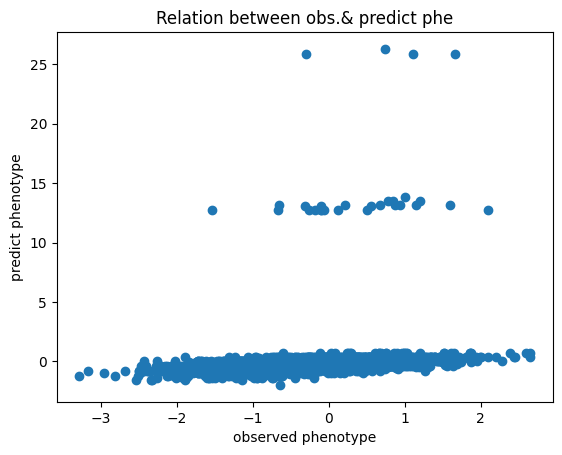

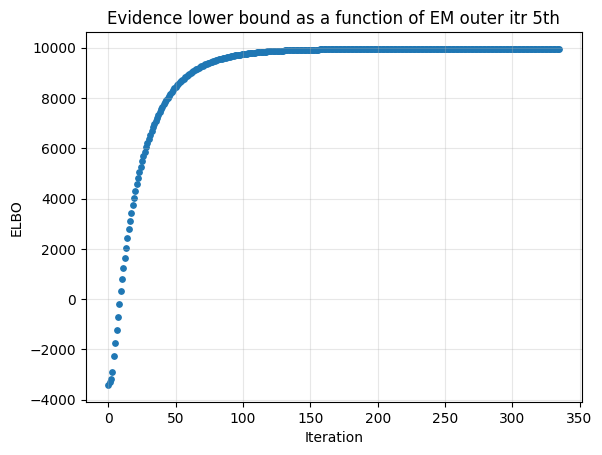

> Reading BED file...
> Generating polygenic scores...
> Performing GWAS...


/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


> Reading BED file...
> Reading summary statistics file...
> Harmonizing data...
> Computing LD matrix...
> Initializing model parameters
> Loading LD matrices into memory...
> Performing model fit...
> Using up to 1 threads.


 29%|██▉       | 291/1000 [00:00<00:01, 364.18it/s]
Exception ignored in: <finalize object at 0x7fe50c346e50; dead>
Traceback (most recent call last):
  File "/usr/lib/python3.7/weakref.py", line 572, in __call__
    return info.func(*info.args, **(info.kwargs or {}))
  File "/usr/lib/python3.7/tempfile.py", line 934, in _cleanup
    _rmtree(name)
  File "/usr/lib/python3.7/shutil.py", line 485, in rmtree
    onerror(os.lstat, path, sys.exc_info())
  File "/usr/lib/python3.7/shutil.py", line 483, in rmtree
    orig_st = os.lstat(path)
FileNotFoundError: [Errno 2] No such file or directory: 'temp/ld_rt1kbk4a'


Converged at iteration 292 | ELBO: 7507.732037
> Final ELBO: 7507.732037
> Estimated heritability: 0.768005
> Estimated proportion of causal variants: 0.001000
> Generating polygenic scores...


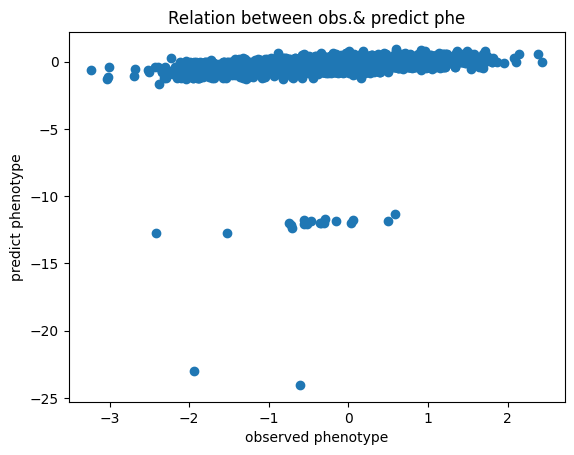

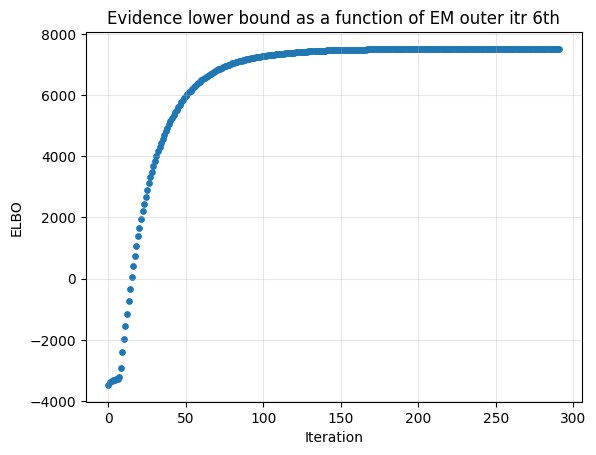

> Reading BED file...
> Generating polygenic scores...
> Performing GWAS...


/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


> Reading BED file...
> Reading summary statistics file...
> Harmonizing data...
> Computing LD matrix...


/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


> Initializing model parameters
> Loading LD matrices into memory...
> Performing model fit...
> Using up to 1 threads.


  1%|▏         | 14/1000 [00:00<00:02, 346.40it/s]

Converged at iteration 15 || ELBO: -3254.656507
> Final ELBO: -3254.656507
> Estimated heritability: 0.316098
> Estimated proportion of causal variants: 0.001000
> Generating polygenic scores...



Exception ignored in: <finalize object at 0x7fe50c17e060; dead>
Traceback (most recent call last):
  File "/usr/lib/python3.7/weakref.py", line 572, in __call__
    return info.func(*info.args, **(info.kwargs or {}))
  File "/usr/lib/python3.7/tempfile.py", line 934, in _cleanup
    _rmtree(name)
  File "/usr/lib/python3.7/shutil.py", line 485, in rmtree
    onerror(os.lstat, path, sys.exc_info())
  File "/usr/lib/python3.7/shutil.py", line 483, in rmtree
    orig_st = os.lstat(path)
FileNotFoundError: [Errno 2] No such file or directory: 'temp/ld_3r9h569y'


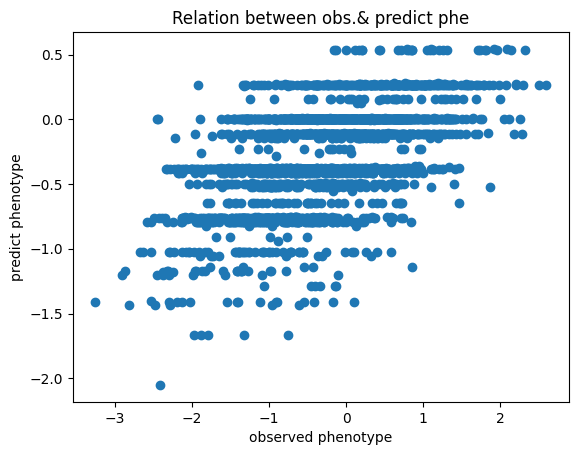

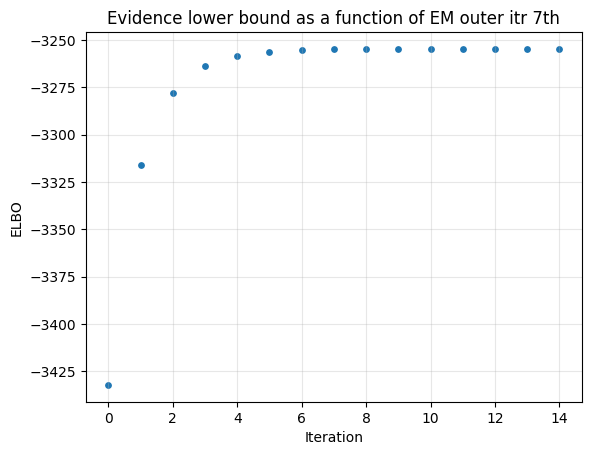

> Reading BED file...
> Generating polygenic scores...
> Performing GWAS...


/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


> Reading BED file...
> Reading summary statistics file...
> Harmonizing data...
> Computing LD matrix...


/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


> Initializing model parameters
> Loading LD matrices into memory...
> Performing model fit...
> Using up to 1 threads.


  2%|▏         | 15/1000 [00:00<00:02, 362.86it/s]

Converged at iteration 16 || ELBO: -3277.429347
> Final ELBO: -3277.429347
> Estimated heritability: 0.308185
> Estimated proportion of causal variants: 0.001000
> Generating polygenic scores...



Exception ignored in: <finalize object at 0x7fe50c10da00; dead>
Traceback (most recent call last):
  File "/usr/lib/python3.7/weakref.py", line 572, in __call__
    return info.func(*info.args, **(info.kwargs or {}))
  File "/usr/lib/python3.7/tempfile.py", line 934, in _cleanup
    _rmtree(name)
  File "/usr/lib/python3.7/shutil.py", line 485, in rmtree
    onerror(os.lstat, path, sys.exc_info())
  File "/usr/lib/python3.7/shutil.py", line 483, in rmtree
    orig_st = os.lstat(path)
FileNotFoundError: [Errno 2] No such file or directory: 'temp/ld_xe4upy5v'


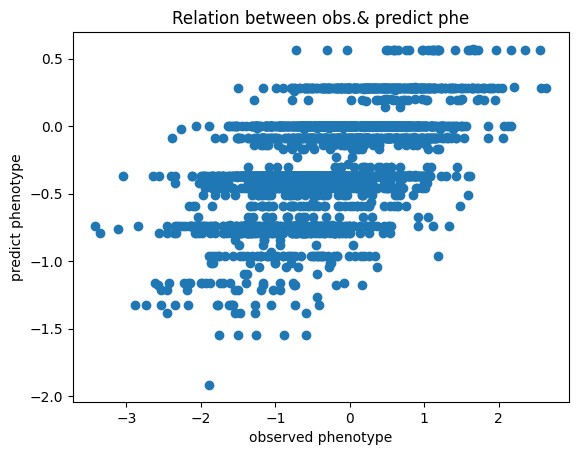

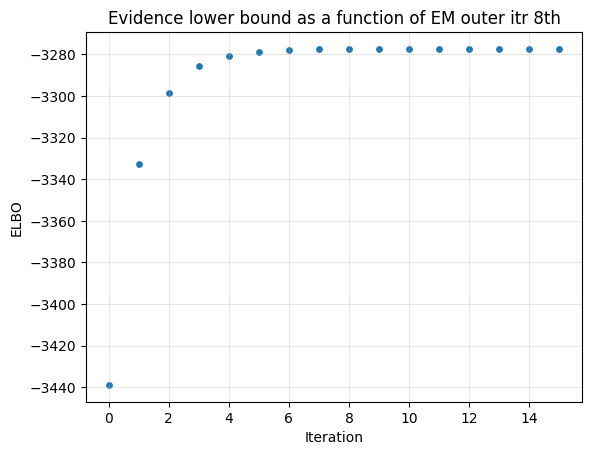

> Reading BED file...
> Generating polygenic scores...
> Performing GWAS...


/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


> Reading BED file...
> Reading summary statistics file...
> Harmonizing data...
> Computing LD matrix...
> Initializing model parameters
> Loading LD matrices into memory...
> Performing model fit...
> Using up to 1 threads.


  2%|▏         | 15/1000 [00:00<00:02, 340.15it/s]

Converged at iteration 16 || ELBO: -3192.276924
> Final ELBO: -3192.276924
> Estimated heritability: 0.337033
> Estimated proportion of causal variants: 0.001000
> Generating polygenic scores...



Exception ignored in: <finalize object at 0x7fe4ec6e03a0; dead>
Traceback (most recent call last):
  File "/usr/lib/python3.7/weakref.py", line 572, in __call__
    return info.func(*info.args, **(info.kwargs or {}))
  File "/usr/lib/python3.7/tempfile.py", line 934, in _cleanup
    _rmtree(name)
  File "/usr/lib/python3.7/shutil.py", line 485, in rmtree
    onerror(os.lstat, path, sys.exc_info())
  File "/usr/lib/python3.7/shutil.py", line 483, in rmtree
    orig_st = os.lstat(path)
FileNotFoundError: [Errno 2] No such file or directory: 'temp/ld_sdwl12rx'


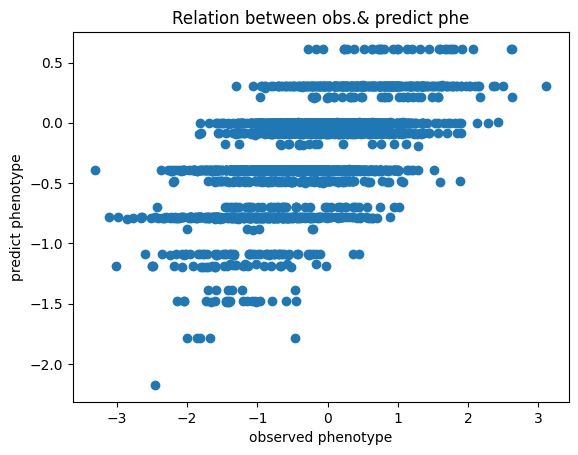

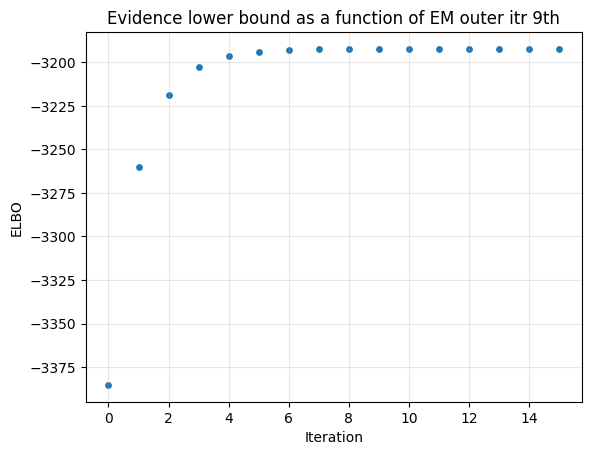

> Reading BED file...
> Generating polygenic scores...
> Performing GWAS...


/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


> Reading BED file...
> Reading summary statistics file...
> Harmonizing data...
> Computing LD matrix...


/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


> Initializing model parameters
> Loading LD matrices into memory...
> Performing model fit...
> Using up to 1 threads.


  2%|▏         | 15/1000 [00:00<00:02, 359.87it/s]

Converged at iteration 16 || ELBO: -3302.333729
> Final ELBO: -3302.333729
> Estimated heritability: 0.299214
> Estimated proportion of causal variants: 0.001000
> Generating polygenic scores...



Exception ignored in: <finalize object at 0x7fe50c10def0; dead>
Traceback (most recent call last):
  File "/usr/lib/python3.7/weakref.py", line 572, in __call__
    return info.func(*info.args, **(info.kwargs or {}))
  File "/usr/lib/python3.7/tempfile.py", line 934, in _cleanup
    _rmtree(name)
  File "/usr/lib/python3.7/shutil.py", line 485, in rmtree
    onerror(os.lstat, path, sys.exc_info())
  File "/usr/lib/python3.7/shutil.py", line 483, in rmtree
    orig_st = os.lstat(path)
FileNotFoundError: [Errno 2] No such file or directory: 'temp/ld_qjbse_6w'


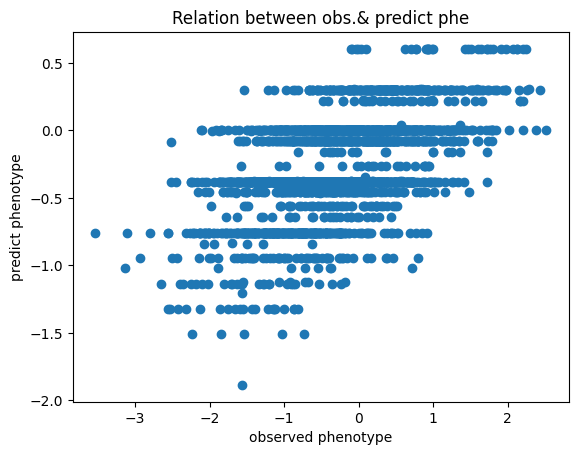

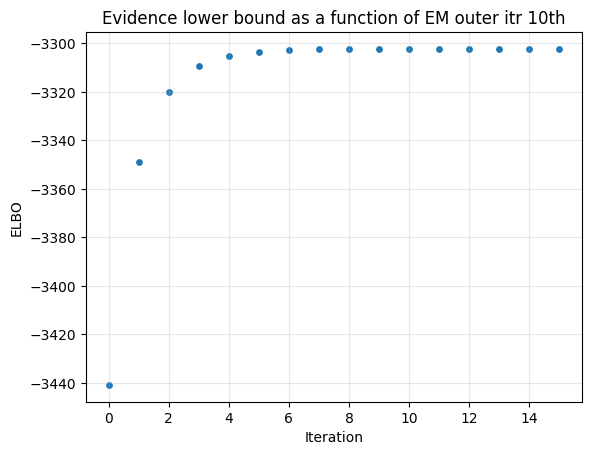

In [4]:
list_r2 = []
for i in range(1, 11):
    r_squ, elbo_list,pre, phe = fixed_beta_500Variants()
    list_r2.append(r_squ)
    plot_obs_vs_pred(phe, pre)
    pict_name = "ELBO_history_fig/set_beta500_itr"+ str(i) + ".png"
    ELBO_plot(elbo_list, "ELBO_history_fig/set_beta500.png",itr=i)

In [6]:
list_r2

[0.04190719891488418,
 0.29161704323670457,
 0.3128557472062485,
 0.302795101789725,
 0.045911166201684894,
 0.037571771870557456,
 0.3010753842314266,
 0.286624099047479,
 0.3285285735393722,
 0.29516963901044435]

compute Pearson correlation, and other methods which compare the discrete data and continuous data.

In [7]:
# Pearson correlation
corr_train, p_value_train = pearsonr(pre, phe)
corr_train

0.5432951674830583

In [8]:
0.5432951674830583*0.5432951674830583

0.29516963901044435

In [9]:
import numpy as np
from scipy import stats
# Generate example data
continuous_variable = phe
dichotomous_variable = pre
# Calculate point-biserial correlation
rpb, _ = stats.pointbiserialr(continuous_variable, dichotomous_variable)
print("Point-biserial correlation:", rpb)



Point-biserial correlation: 0.5432951674830583


In [10]:
import numpy as np
from scipy import stats
# Generate example data
continuous_variable = phe
ordinal_variable = pre  # Assuming 3 ordered categories
# Calculate ranks for the ordinal variable
ranks = stats.rankdata(ordinal_variable)
# Calculate rank-biserial correlation
rbs, _ = stats.pointbiserialr(continuous_variable, ranks)
print("Rank-biserial correlation:", rbs)


Rank-biserial correlation: 0.5351093376181755


In [5]:
g_sim = mgp.GWASimulator("CMAll_qced/chr22/shuffle_500snps",
                            pi = [.99, .01],
                            h2=0.5)

g_sim.simulate()
g_sim.beta

> Reading BED file...
> Generating polygenic scores...


{22: array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        , 